## Load data

In [1]:
import os
import re
import functools
import numpy as np
import pandas as pd
import pickle5 as pickle

In [2]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    #return lst3
    return lst3

In [3]:
# CURR_PATH = os.getcwd()
CURR_PATH = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM'
DATA_PATH = '/home/svetlanamaslenkova/Documents/data/'
DF_PATH = CURR_PATH +'/dataframes/'

In [4]:
ED_PATH = DATA_PATH+'physionet.org/files/mimic-iv-ed/1.0/ed/'
PKL_PATH = CURR_PATH+'/pickles/'
PKL_PATH

'/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/pickles/'

In [5]:
import pandas as pd

data_icd_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_icd_diagnoses.csv')

data_icd_diagnoses.columns = data_icd_diagnoses.columns.str.lower()
data_icd_diagnoses.long_title = data_icd_diagnoses.long_title.str.lower()

data_icd_diagnoses.head()

,icd_code,icd_version,long_title
0,0010,9,cholera due to vibrio cholerae
1,0011,9,cholera due to vibrio cholerae el tor
2,0019,9,"cholera, unspecified"
3,0020,9,typhoid fever
4,0021,9,paratyphoid fever a


In [6]:
import pandas as pd

data_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/diagnoses_icd.csv')

data_diagnoses.columns = data_diagnoses.columns.str.lower()

data_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [7]:
import pandas as pd

data_patients = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/patients.csv')

data_patients.columns = data_patients.columns.str.lower()

data_patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [8]:
import pandas as pd

data_admissions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/admissions.csv')

data_admissions.columns = data_admissions.columns.str.lower()

data_admissions.head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,14679932,21038362,2139-09-26 14:16:00,2139-09-28 11:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0
1,15585972,24941086,2123-10-07 23:56:00,2123-10-12 11:22:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0


In [9]:
data_admissions['hadm_id'] = data_admissions['hadm_id'].astype(int)

In [10]:
import pandas as pd

data_edstays = pd.read_csv(ED_PATH+'edstays.csv')

data_edstays.columns = data_edstays.columns.str.lower()

data_edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime
0,10000115,NaN,38081480,2154-12-10 02:04:00,2154-12-10 02:16:00
1,10000115,NaN,30295111,2154-12-17 16:37:00,2154-12-17 17:38:00
2,10000473,NaN,33267868,2138-03-15 20:07:00,2138-03-15 20:26:00
3,10000764,27897940.0,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59
4,10001038,NaN,34301067,2149-08-07 08:51:00,2149-08-07 08:55:00


In [11]:
import pandas as pd

data_vitals = pd.read_csv(ED_PATH+'vitalsign.csv')

data_vitals.columns = data_vitals.columns.str.lower()

data_vitals.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,16113983,37539106,2116-06-10 00:32:00,98.2,82.0,15.0,NaN,106.0,72.0,NaN,NaN
1,15128994,30058281,2167-08-29 02:25:00,98.3,79.0,20.0,97.0,126.0,73.0,NaN,0
2,15128994,30058281,2167-08-29 04:51:00,97.6,79.0,20.0,98.0,126.0,73.0,NaN,0
3,15128994,30058281,2167-08-29 05:35:00,98.3,76.0,18.0,NaN,123.0,68.0,NaN,0/10
4,18019452,37300626,2148-12-19 12:34:00,98.1,100.0,16.0,98.0,129.0,86.0,NaN,0


In [12]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
# data_vitals['charttime'] = pd.to_datetime(data_vitals['charttime'], format=format_)
data_admissions['admittime'] = pd.to_datetime(data_admissions['admittime'], format=format_)
data_admissions['dischtime'] = pd.to_datetime(data_admissions['dischtime'], format=format_)
# data_edstays['hadm_id'] = data_edstays['hadm_id'].dropna().astype('uint64')

In [ ]:
import pandas as pd

data_farmacy = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/pharmacy.csv')

data_farmacy.columns = data_farmacy.columns.str.lower()

data_farmacy.head(5)

In [ ]:
data_farmacy.shape

(14736386, 27)

In [14]:
import pandas as pd

data_prescriptions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/prescriptions.csv')

data_prescriptions.columns = data_prescriptions.columns.str.lower()

# data_prescriptions['ndc'] = data_prescriptions['ndc'].astype('uint64')

data_prescriptions.head(5)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [ ]:
data_prescriptions.shape

(17008053, 17)

In [15]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
data_prescriptions['starttime'] = pd.to_datetime(data_prescriptions['starttime'], format=format_)
data_prescriptions['stoptime'] = pd.to_datetime(data_prescriptions['stoptime'], format=format_)

In [14]:
data_prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008053 entries, 0 to 17008052
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   subject_id        int64         
 1   hadm_id           int64         
 2   pharmacy_id       int64         
 3   starttime         datetime64[ns]
 4   stoptime          datetime64[ns]
 5   drug_type         object        
 6   drug              object        
 7   gsn               object        
 8   ndc               float64       
 9   prod_strength     object        
 10  form_rx           object        
 11  dose_val_rx       object        
 12  dose_unit_rx      object        
 13  form_val_disp     object        
 14  form_unit_disp    object        
 15  doses_per_24_hrs  float64       
 16  route             object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(10)
memory usage: 2.2+ GB


In [16]:
import pandas as pd

data_labitems = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_labitems.csv')

data_labitems.columns = data_labitems.columns.str.lower()
data_labitems.label = data_labitems.label.str.lower()
labitems = data_labitems.copy()
data_labitems.head(2)

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN


In [37]:
%%time
# print('Loading patients lab events table...')
# print('WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...')

# # data_labevents = pd.read_csv('/content/physionet.org/files/mimiciv/1.0/hosp/labevents.csv', nrows=100000000)
# data_labevents = pd.read_csv('/home/svetlanamaslenkova/Documents/data/mimic-iv-1.0/hosp/labevents.csv', 
#         header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
#                             dtype={'subject_id':'uint32', 'flag':'category', 'valueuom':'category'},
#                        keep_default_na=False,low_memory=False)

# data_labevents.columns = data_labevents.columns.str.lower()


Loading patients lab events table...
WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...


In [17]:
import pickle5 as pickle

with open(PKL_PATH+'labevents.pkl', 'rb') as handle:
    labevents = pickle.load(handle)

In [21]:
labevents.shape

(45588398, 8)

Load labevents table:

In [17]:
# take item ids of all needed features

anion_gap_id = labitems[labitems.label.str.contains('anion').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
albumin_id = labitems[labitems.label.str.contains('albumin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bands_id = labitems[labitems.label.str.contains('bands').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bilirubin_id = labitems[labitems.label.str.contains('bilirubin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hematocrit_id = labitems[labitems.label.str.contains('hematocrit').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
lactate_id = labitems[labitems.label.str.contains('lactate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
sodium_id = labitems[labitems.label.str.contains('sodium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bicarbonate_id = labitems[labitems.label.str.contains('bicarbonate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bun_id = labitems[labitems.label.str.contains('nitrogen').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
calcium_id = labitems[labitems.label.str.contains('calcium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
chloride_id = labitems[labitems.label.str.contains('chloride').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
creatinine_id = labitems[labitems.label.str.contains('creatinine').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hemoglobin_id = list(set(labitems[labitems.label.str.contains('hemoglobin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()) - set(['51212']))
inr_id = labitems[labitems.label.str.contains('inr').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
platelet_id = labitems[labitems.label.str.contains('platelet').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
potassium_id = labitems[labitems.label.str.contains('potassium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
pt_id = ['51274', '52921', '52163', '52164']
ppt_id = ['51275', '52923', '52165', '52166', '52166', '52167']
wbc_id = labitems[labitems.label.str.contains('wbc').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
glucose_id = labitems[labitems.label.str.contains('glucose').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()

In [18]:
# put all codes in one list

temp = [albumin_id, sodium_id, bun_id, creatinine_id, inr_id, pt_id, ppt_id, wbc_id, glucose_id, anion_gap_id, bands_id, bilirubin_id, \
   hematocrit_id,  lactate_id, bicarbonate_id, bun_id, calcium_id, chloride_id, hemoglobin_id, platelet_id, potassium_id]

lab_itemids = []

for l in temp:
    lab_itemids = lab_itemids + l
    
# all needed itemids    
len(lab_itemids)

137

In [198]:
# define a chunksize that would occupy a maximum of 1Gb 
# we divide by 10 because we have selected 10 lines in our df_sample
# we then get the integer part of the result
my_chunk = 1000000

# create the iterator
iter_csv = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/labevents.csv', 
        header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
                            dtype={'subject_id':'uint32', 'flag':'str', 'valueuom':'category'},
                       keep_default_na=False,low_memory=False, iterator=True, chunksize=my_chunk)

# concatenate according to a filter to our result dataframe
df_result = pd.concat(
    [chunk[chunk.itemid.isin(lab_itemids)] 
    for chunk in iter_csv])

In [199]:
df_result.shape

(47211600, 8)

In [200]:
labevents = df_result.copy()

In [19]:
## Removing labevents with no hadm_id or no value
labevents = labevents[labevents.hadm_id != '']
labevents = labevents.dropna(subset=['hadm_id'])
labevents['hadm_id'] = pd.to_numeric(labevents['hadm_id'], errors='coerce')
labevents['hadm_id'] = labevents['hadm_id'].astype(int)

# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
labevents['charttime'] = pd.to_datetime(labevents['charttime'], format=format_)

# removing duplicated rows and rows with no value
labevents = labevents.drop_duplicates()
labevents = labevents[labevents.value != '']
# labevents = labevents[~labevents['value'].str.contains("[a-zA-Z]+$")]
labevents['value'] = pd.to_numeric(labevents['value'], errors='coerce')
labevents = labevents.dropna(subset=['value'])

labevents.shape

(27957340, 8)

In [92]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28044130 entries, 150 to 122092787
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   subject_id   uint32        
 1   hadm_id      float64       
 2   specimen_id  int64         
 3   itemid       int64         
 4   charttime    datetime64[ns]
 5   value        object        
 6   valueuom     object        
 7   flag         object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), uint32(1)
memory usage: 1.8+ GB


In [20]:
with open(PKL_PATH + 'labevents.pkl', 'wb') as f:
    pickle.dump(labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

In [130]:
with open('/home/svetlanamaslenkova/Documents/AKI_ml/dataframes' + '/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

admissions = list(dataset.hadm_id.unique())
print(dataset.shape)
print(len(admissions))

(8853, 76)
8853


## Demographics

In [554]:
# merging admissions amd patients tables to get demographics

data_demographics = pd.merge(data_admissions[['subject_id',	'hadm_id',	'admittime',	'dischtime', 'ethnicity']], \
    data_patients[['subject_id',	'gender',	'anchor_age',	'anchor_year']], \
     how='outer', on=['subject_id'])

In [555]:
# get age of patients at the time of an admission

data_demographics['age_of_birth'] = data_demographics['anchor_year'] - data_demographics['anchor_age']
data_demographics['age'] = [value.year for value in data_demographics['admittime']] - data_demographics['age_of_birth']

In [556]:
# drop unnecessary columns

data_demographics = data_demographics.drop(['anchor_age','anchor_year', 'age_of_birth'], axis=1)
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age
0,14679932,21038362.0,2139-09-26 14:16:00,2139-09-28 11:30:00,UNKNOWN,F,0.0
1,15585972,24941086.0,2123-10-07 23:56:00,2123-10-12 11:22:00,WHITE,F,0.0
2,11989120,21965160.0,2147-01-14 09:00:00,2147-01-17 14:25:00,UNKNOWN,M,0.0
3,17817079,24709883.0,2165-12-27 17:33:00,2165-12-31 21:18:00,OTHER,F,0.0
4,15078341,23272159.0,2122-08-28 08:48:00,2122-08-30 12:32:00,BLACK/AFRICAN AMERICAN,M,0.0


In [ ]:
# pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
# pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
# pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
# pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [625]:
data_demographics = data_demographics[data_demographics.age>=18]

In [626]:
# build demographics sentence

data_demographics['demographics'] = data_demographics['ethnicity'].astype(str) + ' ' + data_demographics['gender'].astype(str) + ' ' +  data_demographics['age'].astype(str)

In [623]:
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age,demographics
43,10292548,26653546.0,2120-01-07 05:51:00,2120-01-12 13:45:00,ASIAN,F,35.0,ASIAN F 35.0
44,10292548,24067979.0,2119-07-26 04:35:00,2119-07-27 19:35:00,ASIAN,F,34.0,ASIAN F 34.0
56,19120008,24459786.0,2185-09-18 11:15:00,2185-09-20 15:30:00,ASIAN,M,70.0,ASIAN M 70.0
57,19120008,28496347.0,2187-07-27 01:04:00,2187-08-02 18:16:00,ASIAN,M,72.0,ASIAN M 72.0
58,19120008,27495024.0,2190-06-30 01:16:00,2190-07-18 18:07:00,ASIAN,M,75.0,ASIAN M 75.0


In [627]:
data_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462112 entries, 43 to 523739
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subject_id    462112 non-null  int64         
 1   hadm_id       462112 non-null  float64       
 2   admittime     462112 non-null  datetime64[ns]
 3   dischtime     462112 non-null  datetime64[ns]
 4   ethnicity     462112 non-null  object        
 5   gender        462112 non-null  object        
 6   age           462112 non-null  float64       
 7   demographics  462112 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 31.7+ MB


In [561]:
# with open(PKL_PATH + 'data_demographics.pkl', 'wb') as f:
#     pickle.dump(data_demographics, f, protocol=pickle.HIGHEST_PROTOCOL)

In [127]:
with open(PKL_PATH + 'data_demographics.pkl', 'rb') as f:
    data_demographics = pickle.load(f)

## Lab tests

### Laboratory test results

In [28]:
# Removing labevents with no hadm_id

data_labevents = labevents[~labevents.hadm_id.isnull()].copy()
data_labevents.shape

(28044130, 8)

In [29]:
# merge data_labevents and labitems to get better readable table

data_labevents = data_labevents.merge(data_labitems[['itemid', 'label',	'fluid', 'category']], on='itemid')

In [96]:
# number of unique admissions in data_labevents

data_labevents.hadm_id.unique().shape

(425597,)

In [171]:
data_labevents.head()

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
0,10000764,27897940.0,33770094,51221,2132-10-15 00:50:00,40.2,%,,hematocrit,Blood,Hematology
1,10000764,27897940.0,81855644,51221,2132-10-15 05:00:00,38.7,%,abnormal,hematocrit,Blood,Hematology
2,10000764,27897940.0,26598444,51221,2132-10-15 07:45:00,43.1,%,,hematocrit,Blood,Hematology
3,10000764,27897940.0,4318463,51221,2132-10-16 06:03:00,37.0,%,abnormal,hematocrit,Blood,Hematology
4,10000764,27897940.0,9550105,51221,2132-10-17 05:59:00,35.5,%,abnormal,hematocrit,Blood,Hematology


In [98]:
data_labitems.head()

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN
2,51957,17-hydroxycorticosteroids,Urine,Chemistry,NaN
3,51958,"17-ketosteroids, urine",Urine,Chemistry,NaN
4,52068,24 hr,Blood,Hematology,NaN


In [99]:
# remove duplicates rows  from data_labitems and replace NaN values with ''
data_labitems_names =  data_labitems[['itemid', 'category', 'fluid', 'label']].drop_duplicates()
data_labitems_names['label'] = [str(val).replace("NaN", "") for val in data_labitems_names['label']]

# remove duplicates rows  from data_labevents and merge with labitems names
pid_labevents = data_labevents[['subject_id', 'hadm_id', 'charttime', 'itemid', 'value', 'valueuom', 'specimen_id']].drop_duplicates()
pid_labevents = pd.merge(pid_labevents, data_labitems_names, on=['itemid'])
pid_labevents = pd.merge(pid_labevents, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# make sentences for labevents
pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [100]:
# make day_id column with day 0 is first 24 hours of admission

pid_labevents['day_id'] = pid_labevents['charttime'] - pid_labevents['admittime']
pid_labevents['day_id'] = [d.days for d in pid_labevents.iloc[:, -1]]

In [101]:
# min and max day_id values

print(np.min(pid_labevents.day_id))
print(np.max(pid_labevents.day_id))

-4
1190


In [102]:
# concatenating labtests from the same day into one big sentence

res = pid_labevents.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).lab_test\
        .apply('; '.join)\
            .reset_index(name='lab_tests')

res

,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
3,16925328,20000024,0,Hematology Blood hematocrit {32.1} %; Hematolo...
4,19430048,20000034,0,Hematology Blood hematocrit {30.3} %; Hematolo...
...,...,...,...,...
1828569,16572164,29999828,0,Hematology Blood hematocrit {45.0} %
1828570,16572164,29999828,1,Hematology Blood hematocrit {43.1} %; Hematolo...
1828571,16549335,29999928,0,Hematology Blood hematocrit {38.6} %; Hematolo...
1828572,16549335,29999928,1,Hematology Blood hematocrit {32.0} %; Hematolo...


In [103]:
pid_labevents = res.copy()

In [104]:
print(pid_labevents.shape)
print(res.shape)

(1828574, 4)
(1828574, 4)


In [105]:
# with open(PKL_PATH + 'pid_labevents.pkl', 'wb') as f:
#     pickle.dump(pid_labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

In [134]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

Filter data for target admissins

In [139]:
pid_labevents = pid_labevents[pid_labevents.hadm_id.isin(admissions)]
print(pid_labevents.hadm_id.unique().shape[0])
pid_labevents

8853


,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
98,16788749,20000808,0,Hematology Blood hematocrit {37.9} %; Hematolo...
99,16788749,20000808,1,Hematology Blood hematocrit {35.7} %; Hematolo...
...,...,...,...,...
1828460,19794259,29999396,0,Hematology Blood hematocrit {44.2} %; Hematolo...
1828461,19794259,29999396,1,Hematology Blood hematocrit {40.3} %; Hematolo...
1828484,10698563,29999501,0,Hematology Blood hematocrit {32.9} %; Hematolo...
1828485,10698563,29999501,1,Hematology Blood hematocrit {33.5} %; Hematolo...


### Creatinine

In [104]:
print(labevents.shape)
labevents.head(1)

(27957340, 12)


,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category,loinc_code
0,10000764,27897940,33770094,51221,2132-10-15 00:50:00,40.2,%,,hematocrit,Blood,Hematology,4544-3


In [22]:
#  replacing NaN with 0 for hadm_id

# labevents['hadm_id'] = labevents['hadm_id'].fillna(0).astype(dtype=np.int32, errors='ignore')
labevents = labevents.merge(labitems, on=['itemid'])
labevents_creatinine = labevents[labevents.label=='creatinine'].merge(data_admissions[['hadm_id', 'admittime']], how='left')
labevents_creatinine['day_id'] = labevents_creatinine['charttime'] - labevents_creatinine['admittime']
labevents_creatinine['day_id'] = [d.days for d in labevents_creatinine.iloc[:, -1]]

In [23]:
# the createnine codes we are interested in 

itemid_creatinine = [50912, 52024, 51081]
data_labitems[data_labitems.itemid.isin(itemid_creatinine)]

,itemid,label,fluid,category,loinc_code
514,50912,creatinine,Blood,Chemistry,2160-0
523,51081,"creatinine, serum",Urine,Chemistry,NaN
526,52024,"creatinine, whole blood",Blood,Blood Gas,NaN


In [24]:
# filtering data_labevents table to get only creatinine lab tests

# labevents_creatinine = data_labevents[data_labevents.itemid.isin(itemid_creatinine)].copy()
labevents_creatinine = labevents[labevents.itemid.isin(itemid_creatinine)].copy()
# converting value into float
labevents_creatinine['value'] = labevents_creatinine['value'].astype(float)

In [108]:
print(labevents_creatinine.shape)
print('Unique admissions:', labevents_creatinine.hadm_id.unique().shape)
labevents_creatinine.head(2)

(1187340, 7)
Unique admissions: (180974,)


,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
9,10003299,21476780,2183-02-26 22:18:00,1.1,mg/dL,2183-02-27 15:18:00,-1.0
10,10003299,21476780,2183-02-28 06:42:00,0.9,mg/dL,2183-02-27 15:18:00,0.0


In [27]:
# keep only first test
hid_normal_1_test = labevents_creatinine[~labevents_creatinine.hadm_id.isna()]\
    .copy().sort_values(['hadm_id', 'charttime']).drop_duplicates(subset=['hadm_id'], keep='first')

# first test & normal
hid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].hadm_id.to_list()
pid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].subject_id.to_list()
hid_normal_1test = [int(adm) for adm in hid_normal_1test]

print(f'admissions with the first SCr normal {len(hid_normal_1test)} ')
print(f'patients with the first SCr normal {len(pid_normal_1test)} ')

admissions with the first SCr normal 251589 
patients with the first SCr normal 251589 


In [28]:
# kepp anly admissions with the first SCr - nornal

labevents_creatinine = labevents_creatinine[['subject_id', 'hadm_id', 'charttime', 'value', 'valueuom']]
labevents_creatinine = labevents_creatinine.merge(data_admissions[['subject_id', 'hadm_id', 'admittime']],  how='left', on=['subject_id', 'hadm_id'])
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(hid_normal_1test)]

# remove duplicates and convert hadm_id into int type
labevents_creatinine = labevents_creatinine.drop_duplicates()
labevents_creatinine['hadm_id'] = labevents_creatinine['hadm_id'].astype(dtype=np.int32)

In [29]:
# filter out admissions with less than 2 SCr measurements
S = labevents_creatinine.groupby('hadm_id').count().sort_values('subject_id')
filtered_admissions = S[S.subject_id>1].index.to_list()
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(filtered_admissions)]

In [31]:
labevents_creatinine.hadm_id.unique().shape

(180974,)

In [37]:
# min and max day_id in labevents_creatinine dataframe

print(np.min(labevents_creatinine.day_id))
print(np.max(labevents_creatinine.day_id))

-4.0
1190.0


In [191]:
labevents_creatinine.head()

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
9,10003299,21476780,2183-02-26 22:18:00,1.1,mg/dL,2183-02-27 15:18:00,-1.0
10,10003299,21476780,2183-02-28 06:42:00,0.9,mg/dL,2183-02-27 15:18:00,0.0
11,10003299,20940957,2183-06-27 05:57:00,0.6,mg/dL,2183-06-26 20:27:00,0.0
12,10003299,20940957,2183-06-28 04:42:00,0.7,mg/dL,2183-06-26 20:27:00,1.0
13,10003299,20940957,2183-06-29 05:34:00,0.7,mg/dL,2183-06-26 20:27:00,2.0


In [133]:
# with open(PKL_PATH + 'labevents_creatinine.pkl', 'wb') as f:
#     pickle.dump(labevents_creatinine, f, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
with open(PKL_PATH + 'labevents_creatinine.pkl', 'rb') as f:
    labevents_creatinine = pickle.load(f)

### Calculating AKI time

In [759]:
# function for calculating AKI status for each day of an admission (old)

def get_aki_status(admission):
    adm_labs = labevents_creatinine[(labevents_creatinine.hadm_id==admission)].sort_values('day_id')
    # admittime = data_admissions[data_admissions.hadm_id==admission].admittime
    days = adm_labs.day_id.values.tolist()
    hadm_ids = []
    aki_status = []
    aki_happened = False
    all_days = np.arange(np.min(days), np.max(days)+1)
    
    for day in all_days:
        # print(day)
        hadm_ids.append(admission)
        # first 24 hours of an admission no AKI
        if day == days[0]:
            aki_status.append(0)
            continue
        # put Nan if we do not have SCr measurements for a given day
        elif day not in days:
            aki_status.append(np.nan)
            continue

        # get current day's value
        scr_day = float(adm_labs[adm_labs.day_id==day].sort_values('value', ascending=False).value.values[0])
        # print(f'day {day} creatinine {scr_day}')

        if not aki_happened: 
            # get baselines values
            if len(adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day))]) > 0:
                scr_baseline_1 = adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day+1))].sort_values('value', ascending=True).value.values[0]
            elif len(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day))]) > 0:
                scr_baseline_1 = np.median(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day+1))].value.values)
            else:
                scr_baseline_1 = None

            if len(adm_labs[adm_labs.day_id==(day - 1)]) > 0:
                scr_baseline_2 = adm_labs[adm_labs.day_id.isin(np.arange((day - 1), day+1))].sort_values('value', ascending=True).value.values[0]
            else:
                scr_baseline_2 = None
            # print(f' baseline1 = {scr_baseline_1}, baseline2 = {scr_baseline_2}')

        # calculate aki
        if (scr_baseline_1 is not None)&(scr_baseline_2 is not None):
            if (scr_day >= 1.5*float(scr_baseline_1) ) or (scr_day >= 0.29 + float(scr_baseline_2) ):
                aki_status.append(1)
                aki_happened = True
            else:
                aki_status.append(0)

        elif scr_baseline_1 is not None:
            if scr_day >= 1.5*float(scr_baseline_1):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)

        elif scr_baseline_2 is not None:
            if scr_day >= 0.3 + float(scr_baseline_2):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)
        else:
            aki_status.append(np.nan)

    return {'hadm_id':hadm_ids, 'day_id':all_days, 'aki_status':aki_status}

In [40]:
# function for calculating AKI status for each day of an admission
print_on = False
def get_aki_status(admission):
    try:
        adm_labs = labevents_creatinine[(labevents_creatinine.hadm_id==admission)].sort_values('day_id')
        patient = labevents_creatinine[labevents_creatinine.hadm_id==admission].subject_id.values[0]
        # admittime = data_admissions[data_admissions.hadm_id==admission].admittime
        days = adm_labs.day_id.values.tolist()
        hadm_ids = []
        aki_status = {'AKI_1':[], 'AKI_2':[], 'AKI_3':[]}
        AKI_1 = False
        AKI_2 = False
        AKI_3 = False
        all_days = np.arange(np.min(days), np.max(days)+1)


        for day in all_days:
            hadm_ids.append(admission)
            if day not in days:
                if print_on:
                    print(f'day {day} - no SCr')
                    print(f'AKI_1  [{int(False)}], AKI_2 [{int(False)}], AKI_3 [{int(False)}]')
                    print('----------------')
                aki_status['AKI_1'].append(int(AKI_1))
                aki_status['AKI_2'].append(int(AKI_2))
                aki_status['AKI_3'].append(int(AKI_3))
                continue
            
            row_creatinine = adm_labs[adm_labs.day_id==day].sort_values('value', ascending=False)
            C1 = float(row_creatinine.value.values[0])
            charttime = row_creatinine.charttime.values[0]
            if print_on:
                print(f'day {day} creatinine {C1}')
            
            df_baseline_1 = adm_labs[(adm_labs.charttime + np.timedelta64(24*7, 'h') >= charttime) \
                                            & (adm_labs.charttime < charttime)]

            df_median_baseline = labevents_creatinine[(labevents_creatinine.subject_id==patient)\
                                            &(labevents_creatinine.charttime + np.timedelta64(365, 'D') >= charttime) \
                                                & (labevents_creatinine.charttime < charttime)]

            df_baseline_2 = adm_labs[(adm_labs.charttime + np.timedelta64(48, 'h') >= charttime) \
                                            & (adm_labs.charttime < charttime)]
            # get baselines values
            if len(df_baseline_1) > 0:
                scr_baseline_1 = np.min(df_baseline_1.value.values)

            elif len(df_median_baseline):
                scr_baseline_1 = np.median(df_median_baseline.value.values)
            else:
                scr_baseline_1 = None

            if len(df_baseline_2) > 0:
                scr_baseline_2 = np.min(df_baseline_2.value.values) #.sort_values('value', ascending=True).value.values[0]
            else:
                scr_baseline_2 = None
            if print_on:
                # print(f' baseline1 = {scr_baseline_1}, baseline2 = {scr_baseline_2}')
                print('baseline_1', scr_baseline_1)
                print('baseline_2', scr_baseline_2)
            # calculate aki
            if (scr_baseline_1 is not None):
                RV = np.round(C1 / scr_baseline_1, 2)
                if print_on:
                    print(f'RV = {C1} / {scr_baseline_1} = {RV}')
                if (RV >= 1.5):
                    if C1 >= 4.0:
                        AKI_3 = True
                        AKI_2 = True
                        AKI_1 = True
                    elif RV >=3.0:
                        AKI_3 = True
                        AKI_2 = True
                        AKI_1 = True
                    elif 3.0 > RV >=2.0:
                        AKI_3 = False
                        AKI_2 = True
                        AKI_1 = True
                    elif 2.0 > RV >= 1.5:
                        AKI_3 = False
                        AKI_2 = False
                        AKI_1 = True
                elif  (scr_baseline_2 is not None):
                    if (C1 - scr_baseline_2 > 0.29):
                        AKI_3 = False
                        AKI_2 = False
                        AKI_1 = True
                    else:
                        AKI_3 = False
                        AKI_2 = False
                        AKI_1 = False
                else:
                    AKI_3 = False
                    AKI_2 = False
                    AKI_1 = False
            elif (scr_baseline_2 is not None):
                if (C1 - scr_baseline_2 > 0.29):    
                        AKI_1 = False
                        AKI_2 = False
                        AKI_1 = True
            else:
                AKI_1 = False
                AKI_2 = False
                AKI_3 = False

            aki_status['AKI_1'].append(int(AKI_1))
            aki_status['AKI_2'].append(int(AKI_2))
            aki_status['AKI_3'].append(int(AKI_3))

            if print_on:
                print(f'AKI_1  [{int(AKI_1)}], AKI_2 [{int(AKI_2)}], AKI_3 [{int(AKI_3)}]')
                print('----------------')
    except:
        print(admission)
        return

    return {'hadm_id':hadm_ids, 'day_id':all_days, 'AKI_1':aki_status['AKI_1'], 'AKI_2':aki_status['AKI_2'], 'AKI_3':aki_status['AKI_3']}

In [48]:
patients = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').subject_id.to_list()
admissions = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').hadm_id.to_list()
print(len(admissions))
print(len(patients))

In [34]:
# icd codes for AKI
AKI_icd = list(data_icd_diagnoses[(data_icd_diagnoses.long_title.str.contains('acute')) & (data_icd_diagnoses.long_title.str.contains('kidney'))& (data_icd_diagnoses.long_title.str.contains(('|').join(['failure', 'injury'])))].icd_code.values)

In [35]:
# admissions with AKI icd code AND first createnine test is NORMAL
aki_admissions = data_diagnoses[data_diagnoses.icd_code.isin(AKI_icd)].hadm_id.unique()
aki_admissions = labevents_creatinine[(labevents_creatinine.hadm_id.isin(aki_admissions)) & (labevents_creatinine.hadm_id.isin(hid_normal_1test))].hadm_id.unique()

In [36]:
len(aki_admissions)

14814

In [51]:
admissions = labevents_creatinine[~(labevents_creatinine.hadm_id.isin(aki_admissions)) & (labevents_creatinine.hadm_id.isin(hid_normal_1test))].hadm_id.unique()
len(admissions)

166160

### Check how the function works

In [190]:
aki_status_l = []
errors = []
i = 0
for adm in aki_admissions:
    # if i > 10:break
    if i % 1000==0:
        print(i)
    try:
        aki_status_l.append(get_aki_status(adm))
    except:
        print(adm)
        errors.append(adm)
    i += 1

24885509
1000


In [175]:
final_aki_status = pd.DataFrame()
for e in aki_status_l[:]:
    temp = pd.DataFrame(e)
    final_aki_status = pd.concat([final_aki_status, temp], ignore_index=True)

In [185]:
final_aki_status[final_aki_status.hadm_id==aki_admissions[11]]

,hadm_id,day_id,AKI_1,AKI_2,AKI_3


In [186]:
labevents_creatinine[labevents_creatinine.hadm_id==aki_admissions[11]]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
2256,10109085,25661234,2187-10-25 03:28:00,1.1,mg/dL,2187-10-24 21:56:00,0.0
2257,10109085,25661234,2187-10-26 06:13:00,1.4,mg/dL,2187-10-24 21:56:00,1.0
2258,10109085,25661234,2187-10-27 07:20:00,1.4,mg/dL,2187-10-24 21:56:00,2.0
2259,10109085,25661234,2187-10-28 05:50:00,1.4,mg/dL,2187-10-24 21:56:00,3.0
2260,10109085,25661234,2187-10-28 16:16:00,1.5,mg/dL,2187-10-24 21:56:00,3.0


### Get AKI status with 3 stages

Running the function using Multiprocessing: 

In [52]:
%%time
import traceback
import multiprocessing

admissions = admissions
final_aki_status_2 = pd.DataFrame()
chunk_size = 10000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=80) as pool_obj:
        pid_aki_status = pool_obj.map(get_aki_status, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in pid_aki_status[:]:
        temp = pd.DataFrame(e)
        final_aki_status_2 = pd.concat([final_aki_status_2, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_aki_status_2.pkl', 'wb') as f:
    #     pickle.dump(final_aki_status_2, f, protocol=pickle.HIGHEST_PROTOCOL)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 10000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 20000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 30000 admissions
26518091


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 40000 admissions
26967600


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


27888708
26016638
27145598
Finished 50000 admissions
29781340


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 60000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 70000 admissions
27302667


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 80000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


26049594


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 90000 admissions
27777792
25502517


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 100000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


29230978
Finished 110000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 120000 admissions
29522271


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 130000 admissions
Finished 140000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 150000 admissions
26387145
Finished 160000 admissions


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


Finished 170000 admissions
CPU times: user 13min 13s, sys: 2min 55s, total: 16min 9s
Wall time: 1h 31min 39s


In [58]:
# aki_status_df = pd.concat([final_aki_status_2, final_aki_status], ignore_index=True)

with open(PKL_PATH + 'aki_status_df.pkl', 'rb') as f:
    aki_status_df = pickle.load(f)

Number of AKI and non-AKI admissions:

In [96]:
# AKI stage 3
print('AKI stage 3:', aki_status_df[aki_status_df.AKI_3==1].sort_values('day_id').drop_duplicates(subset=['hadm_id']).shape[0])
# AKI stage 2
print('AKI stage 2:',aki_status_df[(aki_status_df.AKI_3==0)&((aki_status_df.AKI_2==1))].sort_values('day_id').drop_duplicates(subset=['hadm_id']).shape[0])
# AKI stage 1
print('AKI stage 1:',aki_status_df[(aki_status_df.AKI_2==0)&((aki_status_df.AKI_1==1))].sort_values('day_id').drop_duplicates(subset=['hadm_id']).shape[0])
# no AKI
print('no AKI',aki_status_df[(aki_status_df.AKI_2==0)&(aki_status_df.AKI_1==0)&(aki_status_df.AKI_3==0)].sort_values('day_id').drop_duplicates(subset=['hadm_id']).shape[0])

AKI stage 3: 2122
AKI stage 2: 6342
AKI stage 1: 29648
no AKI 180400


In [125]:
# with open(PKL_PATH + 'aki_status_df.pkl', 'wb') as f:
#     pickle.dump(aki_status_df, f, protocol=pickle.HIGHEST_PROTOCOL)

Exclude admissions with AKI according KDIGO who do not have icd code for AKI in diagnoses:

In [98]:
print('aki_admissions:', aki_admissions.shape[0])

aki_admissions: 14814


In [100]:
excluded_admissions = aki_status_df[(aki_status_df.AKI_1==1)&~(aki_status_df.hadm_id.isin(aki_admissions))].sort_values('day_id').drop_duplicates(subset=['hadm_id']).hadm_id.unique()
print('excluded_admissions:', len(excluded_admissions))


excluded_admissions: 22717


In [126]:
aki_status_df[aki_status_df.hadm_id==22009484]

,hadm_id,day_id,AKI_1,AKI_2,AKI_3
115550,22009484,-1.0,0,0,0
115551,22009484,0.0,0,0,0
115552,22009484,1.0,1,0,0
115553,22009484,2.0,1,0,0
115554,22009484,3.0,0,0,0
115555,22009484,4.0,0,0,0
115556,22009484,5.0,0,0,0
115557,22009484,6.0,0,0,0
115558,22009484,7.0,0,0,0


### Here we are manually checking some of the labels:

In [80]:
aki_status_df[aki_status_df.AKI_3==1].sort_values('day_id').drop_duplicates(subset=['hadm_id']).head(5)

,hadm_id,day_id,AKI_1,AKI_2,AKI_3
94229,26447279,-1.0,1,1,1
1035470,22987476,-1.0,1,1,1
130525,20184007,0.0,1,1,1
986463,29305781,0.0,1,1,1
840405,27010361,0.0,1,1,1


In [90]:
adm = 27010361
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses).merge(data_icd_diagnoses[data_icd_diagnoses.icd_code.isin(AKI_icd)])

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title


In [89]:
labevents_creatinine[labevents_creatinine.hadm_id==adm].sort_values('charttime')

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
1971399,13581631,27010361,2197-04-19 00:32:00,0.6,mg/dL,2197-04-18 18:15:00,0.0
1809656,13581631,27010361,2197-04-19 06:05:00,5.8,mg/dL,2197-04-18 18:15:00,0.0
1809657,13581631,27010361,2197-04-20 05:20:00,3.3,mg/dL,2197-04-18 18:15:00,1.0
1809658,13581631,27010361,2197-04-21 04:50:00,2.5,mg/dL,2197-04-18 18:15:00,2.0
1994124,13581631,27010361,2197-04-22 04:40:00,3.7,mg/dL,2197-04-18 18:15:00,3.0
1809659,13581631,27010361,2197-04-23 05:10:00,4.8,mg/dL,2197-04-18 18:15:00,4.0
1809660,13581631,27010361,2197-04-23 07:00:00,4.7,mg/dL,2197-04-18 18:15:00,4.0
1809661,13581631,27010361,2197-04-24 03:34:00,2.7,mg/dL,2197-04-18 18:15:00,5.0


In [159]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
20438,10005348,29496232,2128-09-05 08:30:00,2128-09-12 16:55:00,NaN,ELECTIVE,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [160]:
final_aki_status[final_aki_status.hadm_id==adm]

,hadm_id,day_id,aki_status
36,29496232,0.0,0.0
37,29496232,1.0,0.0
38,29496232,2.0,NaN
39,29496232,3.0,NaN
40,29496232,4.0,0.0
41,29496232,5.0,1.0
42,29496232,6.0,0.0


## Vitals

In [71]:
# replacing Nan values with ''

pid_vitals = pd.merge(data_edstays, data_vitals).drop_duplicates()
pid_vitals['temperature'] = pid_vitals['temperature'].fillna('')
pid_vitals['heartrate'] = pid_vitals['heartrate'].fillna('')
pid_vitals['resprate'] = pid_vitals['resprate'].fillna('')
pid_vitals['o2sat'] = pid_vitals['o2sat'].fillna('')
pid_vitals['sbp'] = pid_vitals['sbp'].fillna('')
pid_vitals['dbp'] = pid_vitals['dbp'].fillna('')
pid_vitals['rhythm'] = pid_vitals['rhythm'].fillna('')
pid_vitals['pain'] = pid_vitals['pain'].fillna('')

In [72]:
# making sentence for each vital signs measurement

pid_vitals['vitals'] = 'temp {' + pid_vitals['temperature'].astype(str) + '} ' + 'heartrate {' + pid_vitals['heartrate'].astype(str) +'} ' \
    + 'resprate {' + pid_vitals['resprate'].astype(str) + '} ' + 'o2sat {' + pid_vitals['o2sat'].astype(str) + '} ' \
         + 'sbp {' + pid_vitals['sbp'].astype(str) + '} ' + 'dbp {' + pid_vitals['dbp'].astype(str) + '} ' \
             + 'rhythm {' + pid_vitals['rhythm'].astype(str) + '} ' + 'pain {' + pid_vitals['pain'].astype(str) + '} ' 


In [73]:
# an example of a single measurement

pid_vitals.iloc[1, -1]

'temp {98.0} heartrate {78.0} resprate {16.0} o2sat {99.0} sbp {116.0} dbp {70.0} rhythm {} pain {0} '

In [74]:
# remove rows with no hadm_id and merge with admissions table

pid_vitals = pid_vitals[~pid_vitals.hadm_id.isna()]
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_vitals = pd.merge(pid_vitals, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# making the day_id column
pid_vitals['day_id'] = pid_vitals['charttime'] - pid_vitals['admittime']
pid_vitals['day_id'] = [d.days for d in pid_vitals.iloc[:, -1]]

In [75]:
# min and max day_id values
print(min(pid_vitals.day_id))
print(max(pid_vitals.day_id))

-24
17


In [76]:
# drop unnecessary columns

pid_vitals = pid_vitals[['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vitals', 'day_id']]

In [77]:
pid_vitals.shape

(1107449, 6)

In [79]:
# converting subject_id and hadm_id into the right type (int)

pid_vitals['subject_id'] = pid_vitals['subject_id'].astype(int)
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_labevents['subject_id'] = pid_labevents['subject_id'].astype(int)
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [80]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vitals,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [81]:
pid_vitals.columns = ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vital', 'day_id']

In [82]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vital,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [83]:
# concatenating the vital sighn measurements from the same day into one sentence

res_vitals = pid_vitals.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).vital\
        .apply('; '.join)\
            .reset_index(name='vitals')

res_vitals

,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
2,16925328,20000024,-1,temp {98.7} heartrate {72.0} resprate {16.0} o...
3,16925328,20000024,0,temp {98.2} heartrate {53.0} resprate {18.0} o...
4,11146739,20000057,-1,temp {99.3} heartrate {81.0} resprate {16.0} o...
...,...,...,...,...
379301,14544496,29999596,0,temp {99.2} heartrate {91.0} resprate {24.0} o...
379302,10355856,29999625,-1,temp {} heartrate {} resprate {} o2sat {} sbp ...
379303,10355856,29999625,0,temp {37.5} heartrate {63.0} resprate {18.0} o...
379304,12133002,29999809,-1,temp {} heartrate {70.0} resprate {15.0} o2sat...


In [84]:
print(pid_vitals.shape)
print(res_vitals.shape)

(1107449, 6)
(379306, 4)


In [85]:
# an example
res_vitals.iloc[10,-1]

'temp {97.7} heartrate {86.0} resprate {18.0} o2sat {99.0} sbp {138.0} dbp {78.0} rhythm {} pain {7} ; temp {98.5} heartrate {54.0} resprate {16.0} o2sat {96.0} sbp {102.0} dbp {51.0} rhythm {} pain {7/10} ; temp {} heartrate {64.0} resprate {18.0} o2sat {98.0} sbp {128.0} dbp {76.0} rhythm {} pain {7/10} ; temp {98.1} heartrate {54.0} resprate {18.0} o2sat {98.0} sbp {120.0} dbp {74.0} rhythm {} pain {} '

In [86]:
pid_vitals = res_vitals.copy()

In [87]:
# with open(PKL_PATH + 'pid_vitals.pkl', 'wb') as f:
#     pickle.dump(pid_vitals, f, protocol=pickle.HIGHEST_PROTOCOL)

In [140]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

## Medications

In [41]:
data_prescriptions.head()

,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [42]:
data_prescriptions['dose_val_rx'] = data_prescriptions['dose_val_rx'].fillna('') 
data_prescriptions['dose_unit_rx'] = data_prescriptions['dose_unit_rx'].fillna('') 
data_prescriptions = data_prescriptions.dropna(subset=['drug'])

In [43]:
data_prescriptions = data_prescriptions.dropna(subset=['starttime'])

In [44]:
pid_prescriptions = data_prescriptions[['subject_id', 'hadm_id', 'pharmacy_id', 'starttime', 'stoptime', 'drug', 'dose_val_rx', 'dose_unit_rx']]
pid_prescriptions = pd.merge(pid_prescriptions,  data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

pid_prescriptions['medication'] = pid_prescriptions['drug'].astype(str) + ' {' + pid_prescriptions['dose_val_rx'].astype(str) + '} ' + pid_prescriptions['dose_unit_rx'].astype(str) + ' '


In [45]:
pid_prescriptions = pid_prescriptions[['subject_id', 'hadm_id', 'starttime', 'stoptime', 'medication']]

In [46]:
pid_prescriptions = pid_prescriptions[~pid_prescriptions.hadm_id.isna()]
# pid_prescriptions['hadm_id'] = pid_prescriptions['hadm_id'].astype(int)
pid_prescriptions = pd.merge(pid_prescriptions, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00


In [47]:
pid_prescriptions['start_day_id'] = pid_prescriptions['starttime'] - pid_prescriptions['admittime']
pid_prescriptions['stop_day_id'] = pid_prescriptions['stoptime'] - pid_prescriptions['admittime']

In [ ]:
pid_prescriptions['start_day_id'] = [int(d.days) for d in pid_prescriptions.iloc[:, -2]]
pid_prescriptions['stop_day_id'] = [d.days for d in pid_prescriptions.iloc[:, -1]]

In [346]:
pid_prescriptions['stop_day_id'] = pid_prescriptions['stop_day_id'].fillna(pid_prescriptions['start_day_id']).astype(int)

In [91]:
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1


In [352]:
# with open(PKL_PATH + 'pid_prescriptions.pkl', 'wb') as f:
#     pickle.dump(pid_prescriptions, f, protocol=pickle.HIGHEST_PROTOCOL)

In [88]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_prescriptions.pkl', 'rb') as f:
    pid_prescriptions = pickle.load(f)

In [93]:
pid_med = pid_prescriptions.copy()
pid_med = pid_med[pid_med.start_day_id >= -2] 

In [94]:
def get_medications(adm):
   
    pid_adm_med = pid_med.copy()
    pid_adm_med = pid_adm_med[pid_adm_med.hadm_id.isin([adm])]

    min_day_id = np.min(pid_adm_med.start_day_id)
    max_day_id = np.max(pid_adm_med.stop_day_id)
    days = max_day_id - min_day_id

    subject_id = []
    hadm_id = []
    day_id = np.arange(min_day_id, max_day_id + 1, 1).tolist()
    meds = pid_adm_med['medication'].unique()
    medications = []

    for idx, day in enumerate(day_id):
        subject_id.append(pid_adm_med.subject_id.unique()[0])
        hadm_id.append(pid_adm_med.hadm_id.unique()[0])
        day_meds = ''
        for med in meds:
            temp = pid_adm_med[pid_adm_med.medication.isin([med])]
            if (int(temp.start_day_id.unique()[0]) <= day) and (int(temp.stop_day_id.unique()[0]) >= day):
                day_meds += med + "; "
        medications.append(day_meds)
       
        
    pid_medications = {'subject_id': subject_id, 'hadm_id': hadm_id, 'day_id': day_id, 'medications': medications}
    return pid_medications


In [107]:
pid_hamds = list(pid_med.hadm_id.unique())
len(pid_hamds)

452098

In [111]:
# %%time
# import traceback
# import multiprocessing

# final_meds = pd.DataFrame()
# pid_hamds = list(pid_med.hadm_id.unique())

# with multiprocessing.Pool(processes=88) as pool_obj:
#     pid_medications = pool_obj.map(get_medications, pid_hamds[:50])


CPU times: user 1.3 s, sys: 15.7 s, total: 17 s
Wall time: 2min 37s


In [110]:
chunk_size = 50000
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size
n_chunks

9

In [ ]:
%%time
import traceback
import multiprocessing

final_meds = pd.DataFrame()
chunk_size = 10
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size


for i in range(0,30):
    with multiprocessing.Pool(processes=88) as pool_obj:
        pid_medications = pool_obj.map(get_medications, pid_hamds[i*chunk_size:(i+1)*chunk_size])

    for e in pid_medications[:]:
        temp = pd.DataFrame(e)
        final_meds = pd.concat([final_meds, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
    #     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
#     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

Here we manually checking some of the predictions:

In [101]:
adm = 22726960
pid_prescriptions[pid_prescriptions.hadm_id==adm]

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1
5,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Sodium Chloride 0.9% Flush {3} mL,2160-01-07 12:00:00,0,1
6,17868682,22726960,2160-01-07 15:00:00,2160-01-08 14:00:00,Ondansetron {4} mg,2160-01-07 12:00:00,0,1
7,17868682,22726960,2160-01-07 15:00:00,2160-01-07 16:00:00,Morphine Sulfate {2-4} mg,2160-01-07 12:00:00,0,0
8,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pantoprazole {40} mg,2160-01-07 12:00:00,0,1
9,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Aluminum-Magnesium Hydrox.-Simethicone {15-30}...,2160-01-07 12:00:00,0,1


In [102]:
data_labevents[data_labevents.hadm_id==adm]

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label_x,fluid_x,category_x,loinc_code,label_y,fluid_y,category_y
438491,17868682,22726960,28372620,50912,2160-01-08 06:50:00,1.1,mg/dL,,creatinine,Blood,Chemistry,2160-0,creatinine,Blood,Chemistry
2416283,17868682,22726960,28372620,50983,2160-01-08 06:50:00,142.0,mEq/L,,sodium,Blood,Chemistry,2951-2,sodium,Blood,Chemistry
4493690,17868682,22726960,28372620,51006,2160-01-08 06:50:00,18.0,mg/dL,,urea nitrogen,Blood,Chemistry,3094-0,urea nitrogen,Blood,Chemistry
7357861,17868682,22726960,28372620,50931,2160-01-08 06:50:00,107.0,mg/dL,abnormal,glucose,Blood,Chemistry,6777-7,glucose,Blood,Chemistry


In [104]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
125978,17868682,22726960,2160-01-07 12:00:00,2160-01-08 12:23:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,2160-01-07 02:37:00,2160-01-07 13:42:00,0


In [105]:
get_medications(adm)

{'subject_id': [17868682, 17868682, 17868682],
 'hadm_id': [22726960, 22726960, 22726960],
 'day_id': [-1, 0, 1],
 'medications': ['BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; ',
  'BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; 1/2 NS {1000} mL ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Morphine Sulfate {2-4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Warfarin {6} mg ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ',
  'BuPROPion (Sustained Release) {150} mg ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ']}

## Diagnoses

In [55]:
data_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [110]:
diagnoses = data_diagnoses.merge(data_admissions[['hadm_id', 'admittime']]).sort_values('admittime')
diagnoses = diagnoses[diagnoses.seq_num <= 10]
# diagnoses['icd_code'] = 'D' + diagnoses['icd_code']
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,admittime
4106,16904137,21081215,2,2851,9,2105-10-04 17:26:00
4100,16904137,21081215,4,5601,9,2105-10-04 17:26:00
4101,16904137,21081215,5,5859,9,2105-10-04 17:26:00
4102,16904137,21081215,3,9974,9,2105-10-04 17:26:00
4103,16904137,21081215,1,1598,9,2105-10-04 17:26:00


In [114]:
res = diagnoses.sort_values(['hadm_id', 'admittime']).groupby(['subject_id', 'hadm_id']).icd_code.apply((' '.join)).reset_index(name='icd_code')
res = res.merge(data_admissions[['hadm_id', 'admittime']])
res.head(3)

,subject_id,hadm_id,icd_code,admittime
0,10000019,25058216,V290 V502 V3000 V053,2129-05-21 19:16:00
1,10000032,22595853,5715 496 5723 78959 30981 V1582 07070 29680,2180-05-06 22:23:00
2,10000032,22841357,07071 V08 2761 5715 78959 496 3051 2875,2180-06-26 18:27:00


In [115]:
format_ = '%Y-%m-%d %H:%M:%S'
res['admittime'] = pd.to_datetime(res['admittime'], format=format_)

In [116]:
len(res.hadm_id.unique())

521110

In [ ]:
adm_previous_diag_dict = {}
i=1
print(f'Total {len(diagnoses.hadm_id.unique())} adms')

for adm in res.hadm_id.unique():
    if i%100==0:
        print(f'{i} patients')
        break
    patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
    admittime = res[res.hadm_id==adm].admittime.values[0]
    prev_diags = diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=2*365))]\
                        .sort_values('admittime', ascending=False).icd_code.tolist()[:30]
    adm_previous_diag_dict[adm] = prev_diags
    print(i)
    i += 1
    if i > 10:break

In [123]:
def get_previous_diagnoses(adm, n=50):
    patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
    admittime = res[res.hadm_id==adm].admittime.values[0]
    prev_diags = diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=2*365))]\
                        .sort_values('admittime', ascending=False).icd_code.tolist()[:n]

    return {adm:prev_diags}

In [118]:
%% time
l = [get_previous_diagnoses(adm) for adm in diagnoses.hadm_id.unique().tolist()[:110]]
df_previous_diags = pd.DataFrame()
dict_previous_diags = {}
for e in l[:]:
    dict_previous_diags.update(e)
# temp = pd.DataFrame.from_dict(dict_previous_diags, orient='index')
# df_previous_diags = pd.concat([df_previous_diags, temp], ignore_index=True)


In [119]:
df_previous_diags = pd.DataFrame()

In [120]:
temp = pd.DataFrame.from_dict(dict_previous_diags, orient='index').reset_index().rename(columns={'index':'hadm_id'})
pd.concat([df_previous_diags, temp], ignore_index=False).drop_duplicates()

,hadm_id,0,1,2,3,4,5,6,7,8,9
0,21081215,None,None,None,None,None,None,None,None,None,None
1,26733622,None,None,None,None,None,None,None,None,None,None
2,20302177,None,None,None,None,None,None,None,None,None,None
3,22079847,None,None,None,None,None,None,None,None,None,None
4,20383396,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
105,21144775,None,None,None,None,None,None,None,None,None,None
106,24201022,None,None,None,None,None,None,None,None,None,None
107,26792087,None,None,None,None,None,None,None,None,None,None
108,29294994,None,None,None,None,None,None,None,None,None,None


In [121]:
pd.DataFrame.from_dict(dict_previous_diags, orient='index')

,0,1,2,3,4,5,6,7,8,9
21081215,None,None,None,None,None,None,None,None,None,None
26733622,None,None,None,None,None,None,None,None,None,None
20302177,None,None,None,None,None,None,None,None,None,None
22079847,None,None,None,None,None,None,None,None,None,None
20383396,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
21144775,None,None,None,None,None,None,None,None,None,None
24201022,None,None,None,None,None,None,None,None,None,None
26792087,None,None,None,None,None,None,None,None,None,None
29294994,None,None,None,None,None,None,None,None,None,None


In [108]:
pd.DataFrame.from_dict(adm_previous_diag_dict, orient='index').fillna('PAD')

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
25058216,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
22595853,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
22841357,D5715,D496,D5723,D78959,D30981,DV1582,D07070,D29680,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
25742920,D2767,D78959,D496,DV08,DV462,D45829,D3051,D07044,D7994,D5715,...,DV08,D07071,D496,D29680,D07070,DV1582,D30981,D78959,D5723,D5715
29079034,D07071,DV08,D2761,D5715,D78959,D496,D3051,D2875,D5715,D496,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
28970421,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
25022803,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
29020699,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
23052089,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
29888819,DZ8546,DR441,DR296,DG3183,DE785,DF0280,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


In [89]:
adm = 25058216
patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
admittime = res[res.hadm_id==adm].admittime.values[0]
diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=365))].sort_values('admittime', ascending=False).icd_code.tolist()[:30]

[]

In [90]:
data_admissions[data_admissions.subject_id==patient].sort_values('admittime', ascending=False)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
266356,10000019,25058216,2129-05-21 19:16:00,2129-05-23 18:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0


In [20]:
# with open(PKL_PATH + 'pid_hid_dignoses.pkl', 'wb') as handle:
#     pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [164]:
%%time
import traceback
import multiprocessing

admissions = diagnoses.hadm_id.unique()
print(f'{len(admissions)} admissions in total.')

df_previous_diags = pd.DataFrame()
dict_previous_diags = {}
chunk_size = 40000
# chunk_size = 50
n_chunks = len(admissions)//chunk_size
# n_chunks = 2

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=86) as pool_obj:
        list_of_dict_diags = pool_obj.map(get_previous_diagnoses, admissions[i*chunk_size:(i+1)*chunk_size])
 
    for e in list_of_dict_diags[:]:
        dict_previous_diags.update(e)

    temp = pd.DataFrame.from_dict(dict_previous_diags, orient='index').reset_index().rename(columns={'index':'hadm_id'})
    df_previous_diags = pd.concat([df_previous_diags, temp], ignore_index=True)

    print("Finished {} admissions. Saving...".format((i+1)*chunk_size))
    with open(PKL_PATH + 'previous_diagnoses_df.pkl', 'wb') as handle:
        pickle.dump(df_previous_diags, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved!')
    dict_previous_diags = {}

521110 admissions in total.
Finished 40000 admissions. Saving...
Saved!
Finished 80000 admissions. Saving...
Saved!
Finished 120000 admissions. Saving...
Saved!
Finished 160000 admissions. Saving...
Saved!
Finished 200000 admissions. Saving...
Saved!
Finished 240000 admissions. Saving...
Saved!
Finished 280000 admissions. Saving...
Saved!
Finished 320000 admissions. Saving...
Saved!
Finished 360000 admissions. Saving...
Saved!
Finished 400000 admissions. Saving...
Saved!
Finished 440000 admissions. Saving...
Saved!
Finished 480000 admissions. Saving...
Saved!
Finished 520000 admissions. Saving...
Saved!
Finished 560000 admissions. Saving...
Saved!
CPU times: user 4min 17s, sys: 4min 33s, total: 8min 51s
Wall time: 2h 42min 23s


In [168]:
df_previous_diags = df_previous_diags.drop_duplicates().fillna('PAD')
df_previous_diags['previous_diags'] = df_previous_diags.loc[:, 0:49].apply(" ".join, axis=1)

In [175]:
df_previous_diags = df_previous_diags[['hadm_id', 'previous_diags']]

In [176]:
print(df_previous_diags.shape)
df_previous_diags.head()

(521110, 2)


,hadm_id,previous_diags
0,21081215,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
1,26733622,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
2,20302177,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
3,22079847,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
4,20383396,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...


In [177]:
with open(PKL_PATH + 'hid_previous_diagnoses.pkl', 'wb') as handle:
    pickle.dump(df_previous_diags, handle, protocol=pickle.HIGHEST_PROTOCOL)

## pretraining_df

### Loading dataframes

Target admissions

In [ ]:
with open('/home/svetlanamaslenkova/Documents/AKI_ml/dataframes' + '/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

admissions = list(dataset.hadm_id.unique())
print(dataset.shape)
print(len(admissions))

In [159]:
with open(PKL_PATH + 'hid_previous_diagnoses.pkl', 'rb') as f:
    df_previous_diags = pickle.load(f)

df_previous_diags = df_previous_diags[df_previous_diags.hadm_id.isin(admissions)]

In [158]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

pid_labevents = pid_labevents[pid_labevents.hadm_id.isin(admissions)]

In [157]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

pid_vitals = pid_vitals[pid_vitals.hadm_id.isin(admissions)]

In [156]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_medications.pkl', 'rb') as f:
    pid_medications = pickle.load(f)

pid_medications = pid_medications[pid_medications.hadm_id.isin(admissions)]

In [155]:
with open(PKL_PATH + 'data_demographics.pkl', 'rb') as f:
    data_demographics = pickle.load(f)

data_demographics = data_demographics[data_demographics.hadm_id.isin(admissions)]

In [160]:
# pid_aki_status
# with open(PKL_PATH + 'pid_aki_status.pkl', 'rb') as f:
#     final_aki_status = pickle.load(f)

with open(PKL_PATH + 'aki_status_df.pkl', 'rb') as f:
    aki_status_df = pickle.load(f)
aki_status_df

,hadm_id,day_id,AKI_1,AKI_2,AKI_3
0,21476780,-1.0,0,0,0
1,21476780,0.0,0,0,0
2,20940957,0.0,0,0,0
3,20940957,1.0,0,0,0
4,20940957,2.0,0,0,0
...,...,...,...,...,...
1076088,28790824,0.0,1,0,0
1076089,23810644,-1.0,0,0,0
1076090,23810644,0.0,0,0,0
1076091,23810644,1.0,1,1,0


In [161]:
pid_medications['subject_id'] = pid_medications['subject_id'].astype(int)
pid_medications['hadm_id'] = pid_medications['hadm_id'].astype(int)
pid_medications['day_id'] = pid_medications['day_id'].astype(int)

In [162]:
print(pid_medications.shape)
print('unique admissions: ', pid_medications.hadm_id.unique().shape)
pid_medications.head()

(58394, 4)
unique admissions:  (8843,)


,subject_id,hadm_id,day_id,medications
560,12280016,25462002,0,Sodium Chloride 0.9% Flush {3} mL ; D5W {250}...
561,12280016,25462002,1,Sodium Chloride 0.9% Flush {3} mL ; D5W {250}...
562,12280016,25462002,2,Sodium Chloride 0.9% Flush {3} mL ; Aspirin {...
743,19717536,29543734,-1,Amlodipine {10} mg ; Aspirin {81} mg ; Valsart...
744,19717536,29543734,0,Amlodipine {10} mg ; Aspirin {81} mg ; Valsart...


In [163]:
print(pid_labevents.shape)
print('unique admissions: ', pid_labevents.hadm_id.unique().shape)
pid_labevents.head(10)

(45087, 4)
unique admissions:  (8853,)


,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
98,16788749,20000808,0,Hematology Blood hematocrit {37.9} %; Hematolo...
99,16788749,20000808,1,Hematology Blood hematocrit {35.7} %; Hematolo...
100,16788749,20000808,2,Hematology Blood hematocrit {35.9} %; Hematolo...
101,16788749,20000808,3,Hematology Blood hematocrit {35.2} %; Hematolo...
102,16788749,20000808,4,Hematology Blood hematocrit {36.1} %; Hematolo...
103,16788749,20000808,5,Hematology Blood hematocrit {31.9} %; Hematolo...
104,16788749,20000808,6,Hematology Blood hematocrit {35.2} %; Hematolo...


In [164]:
print(pid_vitals.shape)
print('unique admissions: ', pid_vitals.hadm_id.unique().shape)
pid_vitals.head()

(7540, 4)
unique admissions:  (4228,)


,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
204,17659100,20005609,-1,temp {98.0} heartrate {67.0} resprate {16.0} o...
213,17579174,20005914,-1,temp {98.4} heartrate {107.0} resprate {17.0} ...
214,17579174,20005914,0,temp {99.1} heartrate {85.0} resprate {16.0} o...


In [165]:
from functools import reduce

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id])))
print(f' number of common patients (labs + meds) {len(common_hadm_ids)}')

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id, pid_vitals.hadm_id])))
print(f' number of common patients (labs + meds + vitals) {len(common_hadm_ids)}')

 number of common patients (labs + meds) 8843
 number of common patients (labs + meds + vitals) 4220


### Making PID dataframe

Since labs and meds have a lot of admissions in common and vitals has much less admissions in common, we first inner joing labs amd meds, and then outer join vitals to the result. 

OR we outer join all 3 dataframes.

In [166]:
print(f'The number of patients in mimic {len(data_patients.subject_id.unique())}')
print(f'The number of admissions in mimic {len(data_admissions.hadm_id.unique())}')

The number of patients in mimic 382278
The number of admissions in mimic 523740


In [167]:
pid = pid_medications.merge(pid_labevents, how='outer', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(pid_vitals,  how='left', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(data_demographics[['subject_id', 'hadm_id', 'demographics']], how='inner')


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [168]:
print(pid.shape)
print(len(pid.hadm_id.unique()))

(59733, 7)
8853


In [169]:
pid = pid.sort_values(['hadm_id', 'day_id'])

In [170]:
pid.head(5)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics
32971,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0
32972,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0
32973,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0
7436,16788749,20000808,-1,Fluticasone Propionate NASAL {1} SPRY ; Sertra...,NaN,NaN,WHITE F 54.0
7437,16788749,20000808,0,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {37.9} %; Hematolo...,NaN,WHITE F 54.0


In [171]:
pid = pid.merge(final_aki_status, how='left', on=['hadm_id', 'day_id'])

In [172]:
pid.head(10)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,AKI_1,AKI_2,AKI_3
0,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
1,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
2,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
3,16788749,20000808,-1,Fluticasone Propionate NASAL {1} SPRY ; Sertra...,NaN,NaN,WHITE F 54.0,NaN,NaN,NaN
4,16788749,20000808,0,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {37.9} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
5,16788749,20000808,1,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {35.7} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
6,16788749,20000808,2,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {35.9} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
7,16788749,20000808,3,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {35.2} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
8,16788749,20000808,4,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {36.1} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
9,16788749,20000808,5,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {31.9} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0


In [177]:
print(f'The numer of rows in the PID dataframe: {pid.shape[0] :,}')
print(f'The number of rows with NaN labels: {pid[pid.AKI_1.isna()].shape[0] :,} \n')

print(f'The number of unique admissions: {pid.hadm_id.unique().shape[0] :,} ')
ratio = sum(pid.AKI_1) / len(pid)
print(f'Number of admissions with AKI 1: {len(pid[pid.AKI_1==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 2: {len(pid[pid.AKI_2==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 3: {len(pid[pid.AKI_3==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 2-3 onset during the first 14 days of their admission: {len(pid[(pid.AKI_2==1)&(pid.day_id<=13)].hadm_id.unique())} \n')

# print(f'Ratio of 1 in the dataset: {np.round(ratio, 3)}')

The numer of rows in the PID dataframe: 59,733
The number of rows with NaN labels: 13,262 

The number of unique admissions: 8,853 
Number of admissions with AKI 1: 853
Number of admissions with AKI 2: 853
Number of admissions with AKI 3: 315
Number of admissions with AKI 2-3 onset during the first 14 days of their admission: 853 



In [178]:
pid.hadm_id.unique().shape[0]

8853

In [680]:
# with open(PKL_PATH + 'pid_402k.pkl', 'wb') as f:
#     pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

The graph below shows how many patients had AKI onset on a particular day of their admission. We can see that most of the patients had AKI whithin the first 4-5 weeks (40 days) af their admission. Particulary, the peak is on the fisrt week.

In [179]:
from matplotlib import pyplot as plt

g1 = pid[pid.aki_status==1].groupby('day_id')
index1 = g1.count().aki_status.sort_values(ascending=False).index
values1 = g1.count().aki_status.sort_values(ascending=False).values

g2 = pid[pid.aki_status==1].sort_values(['hadm_id', 'day_id'])\
                        .drop_duplicates(['hadm_id'], keep='first')\
                            .groupby('day_id')\
                                .count()
index2 = g2.aki_status.sort_values(ascending=False).index
values2 = g2.aki_status.sort_values(ascending=False).values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=False) 

ax1.bar(index1, values1, width=1)
ax1.set_xlim([0,100])
ax1.set_xlabel('day_id')
ax1.set_ylabel('n of rows with AKI')
ax1.set_title('Frequency of AKI on a particular day of an admission')
ax1.grid(True)

ax2.bar(index2, values2, width=1)
ax2.set_xlim([0,40])
ax2.set_xlabel('day_id')
ax2.set_ylabel('n of patients with AKI')
ax2.set_title('Number of *patients* having the first AKI onset on a particular day of an admission')
ax2.grid(True)

AttributeError: 'DataFrame' object has no attribute 'aki_status'

### Manually checking some of the labels:

In [329]:
pid[pid.aki_status==1].hadm_id.unique()[:10]

array([29496232, 27180483, 28406845, 28474294, 24670296, 24287964,
       26166196, 29276678, 28204953, 21462829])

In [330]:
adm = 28474294
labevents_creatinine[labevents_creatinine.hadm_id==adm]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
557,10031358,28474294,2159-10-27 07:15:00,1.1,mg/dL,2159-10-26 14:23:00,0.0
558,10031358,28474294,2159-10-28 06:35:00,1.4,mg/dL,2159-10-26 14:23:00,1.0
559,10031358,28474294,2159-10-29 11:36:00,1.3,mg/dL,2159-10-26 14:23:00,2.0
560,10031358,28474294,2159-10-30 06:40:00,1.4,mg/dL,2159-10-26 14:23:00,3.0
561,10031358,28474294,2159-10-31 06:20:00,1.3,mg/dL,2159-10-26 14:23:00,4.0
562,10031358,28474294,2159-11-01 06:39:00,1.5,mg/dL,2159-10-26 14:23:00,5.0


In [331]:
data_admissions[data_admissions.hadm_id==adm].admittime

38613   2159-10-26 14:23:00
Name: admittime, dtype: datetime64[ns]

In [332]:
pid[pid.hadm_id==adm]

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status
274,10031358.0,28474294,0.0,Insulin {30} UNIT ; Sodium Chloride 0.9% Flus...,Hematology Blood hematocrit {33.4} %; Hematolo...,temp {97.7} heartrate {77.0} resprate {18.0} o...,WHITE M 65.0,0.0
275,10031358.0,28474294,1.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {34.0} %; Hematolo...,NaN,WHITE M 65.0,1.0
276,10031358.0,28474294,2.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {33.5} %; Hematolo...,NaN,WHITE M 65.0,0.0
277,10031358.0,28474294,3.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {33.4} %; Hematolo...,NaN,WHITE M 65.0,1.0
278,10031358.0,28474294,4.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {35.0} %; Hematolo...,NaN,WHITE M 65.0,0.0
279,10031358.0,28474294,5.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {32.8} %; Hematolo...,NaN,WHITE M 65.0,1.0


In [333]:
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10031358,28474294,9,E1169,10,Type 2 diabetes mellitus with other specified ...
1,10031358,28474294,17,I890,10,"Lymphedema, not elsewhere classified"
2,10031358,28474294,13,E1122,10,Type 2 diabetes mellitus with diabetic chronic...
3,10031358,28474294,8,Z794,10,Long term (current) use of insulin
4,10031358,28474294,12,L03032,10,Cellulitis of left toe
5,10031358,28474294,18,E538,10,Deficiency of other specified B group vitamins
6,10031358,28474294,2,M86172,10,"Other acute osteomyelitis, left ankle and foot"
7,10031358,28474294,5,E1140,10,Type 2 diabetes mellitus with diabetic neuropa...
8,10031358,28474294,21,Z87891,10,Personal history of nicotine dependence
9,10031358,28474294,11,E11628,10,Type 2 diabetes mellitus with other skin compl...


In [157]:
# with open(PKL_PATH + 'pid.pkl', 'wb') as f:
#     pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

In [363]:
with open(PKL_PATH + 'pid.pkl', 'rb') as f:
    pid = pickle.load(f)

In [181]:
pid = pid.merge(df_previous_diags, on='hadm_id', how='left')
pid

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,AKI_1,AKI_2,AKI_3,previous_diags
0,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
1,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
2,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
3,16788749,20000808,-1,Fluticasone Propionate NASAL {1} SPRY ; Sertra...,NaN,NaN,WHITE F 54.0,NaN,NaN,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
4,16788749,20000808,0,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {37.9} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
...,...,...,...,...,...,...,...,...,...,...,...
59728,19794259,29999396,2,Allopurinol {300} mg ; Simvastatin {20} mg ; W...,NaN,NaN,WHITE M 87.0,NaN,NaN,NaN,D4019 D7862 D42731 PAD PAD PAD PAD PAD PAD PAD...
59729,10698563,29999501,0,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {32.9} %; Hematolo...,temp {97.3} heartrate {62.0} resprate {18.0} o...,WHITE F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
59730,10698563,29999501,1,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {33.5} %; Hematolo...,NaN,WHITE F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
59731,10698563,29999501,2,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {33.0} %; Hematolo...,NaN,WHITE F 76.0,0.0,0.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...


### Get labels 

We first separate pretraining subject_ids from fine-tuning ones. We take 20,000 patients with AKI during the first 14 days of the admission + 20,000 patients with no AKI. 

Then, we calculate labels for these patients and make fine-tuning set.

We exclude patients ids which we use for FT from pretraining set.

In [192]:
# get 20,000 positive patients (AKI within first 14 days of the admission)
hadm_ids_aki_within_14_days = pid[(pid.aki_status==1)&(pid.day_id<=13)]\
                                    .drop_duplicates(subset=['hadm_id'])\
                                        .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_aki_within_14_days))

# get negative patients (no AKI during the admission)
pos_ids = pid[pid.aki_status==1].hadm_id.unique()
hadm_ids_NO_aki = pid[~pid.hadm_id.isin(pos_ids)]\
                        .drop_duplicates(subset=['hadm_id'])\
                            .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_NO_aki))

# fine-tuning dataset

ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_14_days + hadm_ids_NO_aki)]
ft_admissions = ft_pid.hadm_id.unique().tolist()
print(f'number of admissions for Fine-Tuning: {len(ft_admissions)}')

20000
20000
number of admissions for Fine-Tuning: 40000


In [180]:
pid

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,AKI_1,AKI_2,AKI_3
0,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
1,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
2,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,0.0,0.0,0.0
3,16788749,20000808,-1,Fluticasone Propionate NASAL {1} SPRY ; Sertra...,NaN,NaN,WHITE F 54.0,NaN,NaN,NaN
4,16788749,20000808,0,Glucagon {1} mg ; Fluticasone Propionate NASAL...,Hematology Blood hematocrit {37.9} %; Hematolo...,NaN,WHITE F 54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59728,19794259,29999396,2,Allopurinol {300} mg ; Simvastatin {20} mg ; W...,NaN,NaN,WHITE M 87.0,NaN,NaN,NaN
59729,10698563,29999501,0,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {32.9} %; Hematolo...,temp {97.3} heartrate {62.0} resprate {18.0} o...,WHITE F 76.0,0.0,0.0,0.0
59730,10698563,29999501,1,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {33.5} %; Hematolo...,NaN,WHITE F 76.0,0.0,0.0,0.0
59731,10698563,29999501,2,Sodium Chloride 0.9% Flush {3-10} mL ; Acetam...,Hematology Blood hematocrit {33.0} %; Hematolo...,NaN,WHITE F 76.0,0.0,0.0,0.0


In [469]:
pd.options.mode.chained_assignment = None

def get_labels(adm, pid=pid):
    d = 1
    pid_adm = pid[pid.hadm_id==adm].copy().reset_index().sort_values('day_id')
    pid_labels = pid_adm[['subject_id', 'hadm_id', 'day_id', 'AKI_2']]
    counter = len(pid_adm)
    
    for d in range(1, 8):
        # print('d ', d)
        col_name = 'aki_in_' + str(d) + '_days'
        if counter:
            # print('counter', counter)
            labels = (list(pid_adm.AKI_2.values)[d:])
            # print('labels: ', labels)
            # print('labels + [np.nan]*d: ', labels + [np.nan]*d)
            pid_labels[col_name] = labels + [np.nan]*d
            counter = counter - 1
        else:
            pid_labels[col_name] = [np.nan] * len(pid_adm)

    return pid_labels

In [473]:
len(ft_admissions)

40000

In [470]:
%%time
import traceback
import multiprocessing

df_labels = pd.DataFrame()
admissions = ft_admissions
chunk_size = 20000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=87) as pool_obj:
        temp = pool_obj.map(get_labels, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in temp:
        df_labels = pd.concat([df_labels, e], ignore_index=True)

    print("Finished {} admissions. Saving...".format((i+1)*chunk_size))

    with open(PKL_PATH + 'df_labels.pkl', 'wb') as f:
        pickle.dump(df_labels, f, protocol=pickle.HIGHEST_PROTOCOL)

Finished 20000 admissions. Saving...
Finished 40000 admissions. Saving...
Finished 60000 admissions. Saving...
CPU times: user 3min 9s, sys: 1min 3s, total: 4min 12s
Wall time: 4min 49s


In [710]:
len(ft_pid.hadm_id.unique())

40000

In [482]:
pid_with_labels = ft_pid.merge(df_labels)
print(pid_with_labels.shape)
pid_with_labels.head()

(327010, 15)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,NaN,Hematology Blood hematocrit {39.5} %; Hematolo...,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,Hematology Blood hematocrit {37.9} %; Hematolo...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10005348.0,29496232,0.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {32.5} %; Hematolo...,NaN,WHITE M 76.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN
3,10005348.0,29496232,1.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {31.6} %; Hematolo...,NaN,WHITE M 76.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN
4,10005348.0,29496232,2.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,NaN,NaN,WHITE M 76.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN


In [488]:
# n of admissoins with labels for all  7 days
pid_with_labels[~(pid_with_labels.aki_in_1_days.isna() | pid_with_labels.aki_in_2_days.isna() | pid_with_labels.aki_in_3_days.isna()\
    | pid_with_labels.aki_in_4_days.isna()| pid_with_labels.aki_in_5_days.isna()| pid_with_labels.aki_in_6_days.isna()\
        | pid_with_labels.aki_in_7_days.isna())]\
            .hadm_id.unique().shape[0]

11491

In [ ]:
def difference(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    #return lst3
    return lst3

In [519]:
pid_with_labels['day_info'] = pid_with_labels['demographics'].astype(str) + '$' +  pid_with_labels['vitals'].astype(str) + '$' + pid_with_labels['lab_tests'].astype(str) + '$' + pid_with_labels['medications'].astype(str)

In [491]:
pid_with_labels = pid_with_labels[['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status', \
    'aki_in_1_days',	'aki_in_2_days'	,'aki_in_3_days',	'aki_in_4_days',	'aki_in_5_days',	'aki_in_6_days',	'aki_in_7_days' ]]

In [520]:
pid_with_labels.head(2)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {39.5} %; Hematolo...,NaN,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {97.7} hear...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {37.9} %; Hematolo...,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {99.1} hear...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [493]:
pid_with_labels.loc[0,-1]

nan

In [893]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.04 # test + val size
VAL_SIZE = 0.5
print('n unique admissions: ', len(pid_1day_labels_cleaned.hadm_id.unique()))
train_adms, test_adms = train_test_split(pid_1day_labels_cleaned.hadm_id.unique(), test_size=TEST_SIZE)
test_adms, val_adms = train_test_split(test_adms, test_size=VAL_SIZE)
print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))



Splitting training and testing datsets...
n unique admissions:  165503
n train admissions:  158882
n test admissions:  3310
n val admissions:  3311


### Save df for Pre-training

In [183]:
# pid_noAKIstatus_463k
with open(PKL_PATH + 'pid_402k.pkl', 'rb') as f:
    pid_402k = pickle.load(f)

print(pid_402k.hadm_id.unique().shape[0])
pid_402k.head(1)

402338


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status
0,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,0.0


In [184]:
ft_admissions = admissions

In [185]:
pretraining_df = pid_402k[~pid_402k.hadm_id.isin(ft_admissions)]
pretraining_df.hadm_id.unique().shape[0]

393485

### Add diagnoses to dataframe

In [355]:
pretraining_df = pretraining_df.merge(df_previous_diags, on='hadm_id', how='left')

In [513]:
pretraining_df['day_info'] = pretraining_df['demographics'].astype(str) + '$' +  pretraining_df['vitals'].astype(str) + '$' + pretraining_df['lab_tests'].astype(str) + '$' + pretraining_df['medications'].astype(str) + pretraining_df['previous_diags'].astype(str)

In [489]:
# PREPROCESSING
# lower case
pretraining_df['day_info'] = pretraining_df['day_info'].str.lower()
pretraining_df['day_info'] = pretraining_df['day_info'].replace(r'[{}/]', ' ',  regex=True)

pretraining_df['lab_tests'] = pretraining_df['lab_tests'].str.lower()
pretraining_df['lab_tests'] = pretraining_df['lab_tests'].replace(r'[{}/]', ' ',  regex=True)

pretraining_df['medications'] = pretraining_df['medications'].str.lower()
pretraining_df['medications'] = pretraining_df['medications'].replace(r'[{}/]', ' ',  regex=True)

pretraining_df['vitals'] = pretraining_df['vitals'].str.lower()
pretraining_df['vitals'] = pretraining_df['vitals'].replace(r'[{}/]', ' ',  regex=True)

pretraining_df['demographics'] = pretraining_df['demographics'].str.lower()
pretraining_df['demographics'] = pretraining_df['demographics'].replace(r'[{}/.0]', ' ',  regex=True)

In [518]:
print(pretraining_df.shape)
pretraining_df.head(2)

(2065358, 10)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status,previous_diags,day_info
0,10467237,20000019,0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 26.5 %; hematolo...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $temp 98.0 heartrate ...
1,10467237,20000019,1,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 28.1 %; hematolo...,NaN,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $nan$hematology blood he...


In [491]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
VAL_SIZE = 0.008

print('n unique admissions: ', len(pretraining_df.hadm_id.unique()))
train_adms, val_adms = train_test_split(pretraining_df.hadm_id.unique(), test_size=VAL_SIZE)

print('n train admissions: ', len(train_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  362402
n train admissions:  359502
n val admissions:  2900


In [519]:
train_df_pre = pretraining_df[pretraining_df.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'previous_diags', 'day_info']]
val_df_pre = pretraining_df[pretraining_df.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'previous_diags', 'day_info']]

In [359]:
len(train_df_pre)

2048905

In [520]:
# save data frames
DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

with open(DF_PATH + 'train_df_pretraining.pkl', 'wb') as f:
    pickle.dump(train_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'val_df_pretraining.pkl', 'wb') as f:
    pickle.dump(val_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

In [521]:
train_df_pre.head()

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags,day_info
0,10467237,20000019,0,hispanic latino f 76,hematology blood hematocrit 26.5 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,temp 98.0 heartrate 65.0 resprate 16.0 o...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $temp 98.0 heartrate ...
1,10467237,20000019,1,hispanic latino f 76,hematology blood hematocrit 28.1 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $nan$hematology blood he...
2,10467237,20000019,2,hispanic latino f 76,hematology blood hematocrit 23.9 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $nan$hematology blood he...
3,16925328,20000024,0,white f 92,hematology blood hematocrit 32.1 %; hematolo...,oxycodone (immediate release) 2.5 mg ; gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,white f 92 $temp 98.2 heartrate 53.0 resp...
4,16925328,20000024,1,white f 92,NaN,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,white f 92 $nan$nan$sodium chloride 0.9% flu...


### Save for Fine-Tuning

In [365]:
pid['demographics'] = pid['demographics'].replace(r'[.0]', '', regex=True)

In [407]:
pid['day_info'] = pid['demographics'].astype(str) + '$' +  pid['vitals'].astype(str) + '$' + pid['lab_tests'].astype(str) + '$' + pid['medications'].astype(str)

In [408]:
pid.head(2)

,subject_id,hadm_id,day_id,lab_tests,medications,vitals,demographics,aki_status,previous_diags,day_info
0,10467237,20000019,0,hematology blood hematocrit 26.5 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$temp 98.0 heartrate 65...
1,10467237,20000019,1,hematology blood hematocrit 28.1 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$nan$hematology blood hema...


In [442]:
# get 20,000 positive patients (AKI within first 14 days of the admission)

# hadm_ids_aki_within_14_days = pid[(pid.aki_status==1)&(pid.day_id<=13)]\
#                                     .drop_duplicates(subset=['hadm_id'])\
#                                         .sample(n=20000).hadm_id.to_list()
# print(len(hadm_ids_aki_within_14_days))

hadm_ids_aki_within_6_days = pid[(pid.aki_status==1)&(pid.day_id<=5)]\
                                    .drop_duplicates(subset=['hadm_id'])\
                                        .hadm_id.to_list()
print(len(hadm_ids_aki_within_6_days))

# get negative patients (no AKI during the admission)
pos_ids = pid[pid.aki_status==1].hadm_id.unique()
hadm_ids_NO_aki = pid[~pid.hadm_id.isin(pos_ids)]\
                        .drop_duplicates(subset=['hadm_id'])\
                            .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_NO_aki))

# fine-tuning dataset

# ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_14_days + hadm_ids_NO_aki)]
ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_6_days + hadm_ids_NO_aki)]
ft_admissions = ft_pid.hadm_id.unique().tolist()
print(f'number of admissions for Fine-Tuning: {len(ft_admissions)}')

17287
20000
number of admissions for Fine-Tuning: 37287


In [443]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.15
VAL_SIZE = 0.5

print('n unique admissions: ', len(ft_pid.hadm_id.unique()))

train_adms, temp_adms = train_test_split(ft_pid.hadm_id.unique(), test_size=TEST_SIZE)
test_adms, val_adms = train_test_split(temp_adms, test_size=VAL_SIZE)

print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  37287
n train admissions:  31693
n test admissions:  2797
n val admissions:  2797


In [444]:
train_df_finetuning = ft_pid[ft_pid.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'previous_diags', 'aki_status']]
test_df_finetuning = ft_pid[ft_pid.hadm_id.isin(test_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals','day_info', 'previous_diags', 'aki_status']]
val_df_finetuning = ft_pid[ft_pid.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'previous_diags','aki_status']]

In [445]:
ft_admissions = train_df_finetuning.hadm_id.unique().tolist() \
    + test_df_finetuning.hadm_id.unique().tolist() \
        + val_df_finetuning.hadm_id.unique().tolist()
len(ft_admissions)

37287

In [446]:
train_df_finetuning.hadm_id.unique().shape[0]

31693

In [447]:
train_df_finetuning.head()

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,previous_diags,aki_status
32,11082580,20000769,0,asian f 43,hematology blood hematocrit 34.1 %; hematolo...,NaN,NaN,asian f 43$nan$hematology blood hematocrit 34...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,0.0
33,11082580,20000769,1,asian f 43,hematology blood hematocrit 30.7 %; hematolo...,NaN,NaN,asian f 43$nan$hematology blood hematocrit 30...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,1.0
34,11082580,20000769,2,asian f 43,hematology blood hematocrit 25.0 %; hematolo...,sterile water 500 ml ; magnesium sulfate (ob...,NaN,asian f 43$nan$hematology blood hematocrit 25...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,1.0
49,18125327,20001004,1,white m 19,chemistry blood anion gap 13 meq l; chemistr...,lithium carbonate 600 mg ; lamotrigine 100 ...,NaN,white m 19$nan$chemistry blood anion gap 13 ...,D30520 D29640 D30500 D29640 DV4987 DV1581 D305...,0.0
50,18125327,20001004,7,white m 19,chemistry blood anion gap 10 meq l; chemistr...,diphenhydramine 25 mg ; nicotine polacrilex ...,NaN,white m 19$nan$chemistry blood anion gap 10 ...,D30520 D29640 D30500 D29640 DV4987 DV1581 D305...,NaN


In [449]:
DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

# with open(DF_PATH + 'train_df_finetuning.pkl', 'rb') as f:
#    train_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'test_df_finetuning.pkl', 'rb') as f:
#     test_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'val_df_finetuning.pkl', 'rb') as f:
#    val_df_finetuning = pickle.load(f)


In [ ]:
# from functools import reduce

# print('Number of patients in train_df_finetuning: ', train_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_train = list(reduce(set.intersection, map(set, [train_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_train)}')

# print('\nNumber of patients in test_df_finetuning: ', test_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_test = list(reduce(set.intersection, map(set, [test_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_test)}')

# print('\nNumber of patients in test_df_finetuning: ', val_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_val = list(reduce(set.intersection, map(set, [val_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_val)}')

In [373]:
print('n samples in train_df', len(train_df_finetuning))
print('n samples in test_df', len(test_df_finetuning))
print('n samples in val_df', len(val_df_finetuning))

n samples in train_df 259030
n samples in test_df 22239
n samples in val_df 23223


### Save files for tokenizer

In [374]:
with open(DF_PATH + 'train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)

In [375]:
print(train_df.shape)
train_df.head()

(713917, 9)


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status
0,10467237,20000019,0,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {26.5} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0 temp {98.0} heartrate {...,0.0
1,10467237,20000019,1,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {28.1} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN,HISPANIC/LATINO F 76.0 nan Hematology Blood he...,0.0
3,11146739,20000057,0,WHITE F 93.0,Hematology Blood hematocrit {38.4} %; Hematolo...,Timolol Maleate 0.5% {1} DROP ; Levothyroxine ...,temp {} heartrate {82.0} resprate {16.0} o2sat...,WHITE F 93.0 temp {} heartrate {82.0} resprate...,0.0
4,11146739,20000057,1,WHITE F 93.0,Hematology Blood hematocrit {38.2} %; Hematolo...,Timolol Maleate 0.5% {1} DROP ; Levothyroxine ...,NaN,WHITE F 93.0 nan Hematology Blood hematocrit {...,0.0
5,14990224,20000147,0,WHITE M 71.0,Hematology Blood hematocrit {38.3} %; Hematolo...,Sodium Chloride 0.9% Flush {10} mL ; Influenz...,NaN,WHITE M 71.0 nan Hematology Blood hematocrit {...,0.0


In [379]:
print(pid.shape)
pid.head()

(974277, 10)


,subject_id,hadm_id,day_id,lab_tests,medications,vitals,demographics,aki_status,previous_diags,day_info
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$temp 98.0 heartrate 65...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN,HISPANIC/LATINO F 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$nan$hematology blood hema...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN,HISPANIC/LATINO F 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$nan$hematology blood hema...
3,18910522,20000041,0,Hematology Blood hematocrit {28.2} %; Hematolo...,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,NaN,WHITE F 63,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,white f 63$nan$hematology blood hematocrit 28...
4,18910522,20000041,2,Hematology Blood hematocrit {25.4} %; Hematolo...,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,NaN,WHITE F 63,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,white f 63$nan$hematology blood hematocrit 25...


In [380]:
# PREPROCESSING
# lower case
# pid['day_info'] = pid['day_info'].str.lower()
# pid['day_info'] = pid['day_info'].replace(r'[{}/]', ' ',  regex=True)

pid['lab_tests'] = pid['lab_tests'].str.lower()
pid['lab_tests'] = pid['lab_tests'].replace(r'[{}/]', ' ',  regex=True)

pid['medications'] = pid['medications'].str.lower()
pid['medications'] = pid['medications'].replace(r'[{}/]', ' ',  regex=True)

pid['vitals'] = pid['vitals'].str.lower()
pid['vitals'] = pid['vitals'].replace(r'[{}/]', ' ',  regex=True)

pid['demographics'] = pid['demographics'].str.lower()
pid['demographics'] = pid['demographics'].replace(r'[{}/.0]', ' ',  regex=True)

In [450]:
pid.iloc[49,:]

subject_id                                                 18125327
hadm_id                                                    20001004
day_id                                                            1
lab_tests         chemistry blood anion gap  13  meq l; chemistr...
medications       lithium carbonate  600  mg ; lamotrigine  100 ...
vitals                                                          NaN
demographics                                             white m 19
aki_status                                                      0.0
previous_diags    D30520 D29640 D30500 D29640 DV4987 DV1581 D305...
day_info          white m 19$nan$chemistry blood anion gap  13  ...
Name: 49, dtype: object

In [382]:
train_df = pid[pid.hadm_id.isin(train_df.hadm_id.unique())]


In [383]:
train_df_finetuning.hadm_id.unique().shape[0]

(910801, 10)


,subject_id,hadm_id,day_id,lab_tests,medications,vitals,demographics,aki_status,previous_diags,day_info
0,10467237,20000019,0,hematology blood hematocrit 26.5 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$temp 98.0 heartrate 65...
1,10467237,20000019,1,hematology blood hematocrit 28.1 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$nan$hematology blood hema...
2,10467237,20000019,2,hematology blood hematocrit 23.9 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,hispanic latino f 76,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76$nan$hematology blood hema...
5,11146739,20000057,0,hematology blood hematocrit 38.4 %; hematolo...,timolol maleate 0.5% 1 drop ; levothyroxine ...,temp heartrate 82.0 resprate 16.0 o2sat...,white f 93,0.0,DE8889 DE8490 D9597 PAD PAD PAD PAD PAD PAD PA...,white f 93$temp heartrate 82.0 resprate ...
6,11146739,20000057,1,hematology blood hematocrit 38.2 %; hematolo...,timolol maleate 0.5% 1 drop ; levothyroxine ...,NaN,white f 93,0.0,DE8889 DE8490 D9597 PAD PAD PAD PAD PAD PAD PA...,white f 93$nan$hematology blood hematocrit 38...


In [638]:
# DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

# with open(DF_PATH + 'train_df_finetuning.pkl', 'rb') as f:
#    train_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'test_df_finetuning.pkl', 'rb') as f:
#     test_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'val_df_finetuning.pkl', 'rb') as f:
#    val_df_finetuning = pickle.load(f)

In [ ]:
# from functools import reduce

# print('Number of patients in train_df_finetuning: ', train_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_train = list(reduce(set.intersection, map(set, [train_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_train)}')

# print('\nNumber of patients in test_df_finetuning: ', test_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_test = list(reduce(set.intersection, map(set, [test_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_test)}')

# print('\nNumber of patients in test_df_finetuning: ', val_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_val = list(reduce(set.intersection, map(set, [val_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_val)}')

In [838]:
print('n samples in train_df', len(train_df_finetuning))
print('n samples in test_df', len(test_df_finetuning))
print('n samples in val_df', len(val_df_finetuning))

n samples in train_df 315517
n samples in test_df 27001
n samples in val_df 27185


## Save files for tokenizer
print(train_df.shape)
train_df.head()

In [316]:
from tqdm.auto import tqdm

def create_text_seq(data, txt_dir):
    text_data = []
    file_count = 0

    for _, sample in tqdm(data.iterrows()):
        text_data.append(sample['day_info'])
        if len(text_data) == 5000:
            # once we hit the 5K mark, save to file
            if not os.path.exists(txt_dir):
                os.makedirs(txt_dir)
            with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
                fp.write('\n'.join(text_data))
            text_data = []
            file_count += 1
            print(f"Saved {5000 + (5000 * (file_count - 1))} samples")

    if (len(data) % 5000) != 0:
        with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        print(f"Saved {5000 + (5000 * (file_count - 1)) + len(text_data)} samples")

In [ ]:
TXT_DIR_TRAIN = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/txt_files/train'
create_text_seq(data=train_df, txt_dir=TXT_DIR_TRAIN)

In [452]:
# read some txt
i = 0
with open(TXT_DIR_TRAIN+'/text_0.txt') as f:
    for line in f:
        print(line)
        print('-----------------------------------------')
        i = i + 1
        if i > 1:
            break
f.close()

hispanic latino f 76$temp  98.0  heartrate  65.0  resprate  16.0  o2sat  100.0  sbp  106.0  dbp  50.0  rhythm    pain  0  $hematology blood hematocrit  26.5  %; hematology blood hemoglobin  9.2  g dl; hematology blood platelet count  183  k ul; chemistry blood anion gap  14  meq l; chemistry blood bicarbonate  24  meq l; chemistry blood chloride  103  meq l; chemistry blood creatinine  1.1  mg dl; chemistry blood potassium  3.5  meq l; chemistry blood sodium  137  meq l; chemistry blood urea nitrogen  19  mg dl; chemistry blood glucose  169  mg dl$pneumococcal 23-valent polysaccharide vaccine  0.5  ml ; sodium chloride 0.9%  flush  3  ml ; 0.9% sodium chloride  1000  ml ; acetaminophen  500-1000  mg ; polyethylene glycol  17  g ; iso-osmotic dextrose  50  ml ; ceftriaxone  1  gm ; insulin  0  unit ; dextrose 50%  12.5  gm ; glucagon  1  mg ; glucose gel  15  g ; docusate sodium  100  mg ; heparin  5000  unit ; aspirin  81  mg ; ceftriaxone  2  gm ; bag  100  ml ; magnesium sulfate  4  

In [ ]:
# 2650
import nltk

maxlen = -1
for doc in train_df.day_info:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print('the maximum len is ', maxlen)

In [454]:
from tokenizers import  Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import glob

os.environ["TOKENIZERS_PARALLELISM"] = "true"
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(special_tokens=["[PAD]", "[UNK]", '[pad]'], min_frequency=5)
files = glob.glob(TXT_DIR_TRAIN+'/*')
tokenizer.train(files, trainer)
os.environ["TOKENIZERS_PARALLELISM"] = "false"

tokenizer.save(CURR_PATH+"/tokenizer.json")

In [453]:
vocab_size = tokenizer.get_vocab_size()
print(f' vocab_size = {vocab_size}')

 vocab_size = 26153


In [455]:
# testing cell
text = "hispanic latino f 76$nan$hematology blood hematocrit  28.1  %; hematology blood hemoglobin  9.7  g dl; hematology blood platelet count  195  k ul; chemistry blood anion gap  12  meq l; chemistry blood bicarbonate  28  meq l; chemistry blood chloride  100  meq l; chemistry blood creatinine  1.2  mg dl; chemistry blood potassium  3.7  meq l; chemistry blood sodium  136  meq l; chemistry blood urea nitrogen  17  mg dl; chemistry blood calcium, total  8.8  mg dl; chemistry blood glucose  190  mg dl$pneumococcal 23-valent polysaccharide vaccine  0.5  ml ; sodium chloride 0.9%  flush  3  ml ; 0.9% sodium chloride  1000  ml ; polyethylene glycol  17  g ; insulin  0  unit ; dextrose 50%  12.5  gm ; glucagon  1  mg ; glucose gel  15  g ; docusate sodium  100  mg ; heparin  5000  unit ; aspirin  81  mg ; ceftriaxone  2  gm ; bag  100  ml ; magnesium sulfate  4  gm ; simvastatin  40  mg ; ciprofloxacin hcl  500  mg ; $pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad"
output = tokenizer.encode(text)
max_length = 128

print(output.tokens)
print(output.ids)

['hispanic', 'latino', 'f', '76', '$', 'nan', '$', 'hematology', 'blood', 'hematocrit', '28', '.', '1', '%;', 'hematology', 'blood', 'hemoglobin', '9', '.', '7', 'g', 'dl', ';', 'hematology', 'blood', 'platelet', 'count', '195', 'k', 'ul', ';', 'chemistry', 'blood', 'anion', 'gap', '12', 'meq', 'l', ';', 'chemistry', 'blood', 'bicarbonate', '28', 'meq', 'l', ';', 'chemistry', 'blood', 'chloride', '100', 'meq', 'l', ';', 'chemistry', 'blood', 'creatinine', '1', '.', '2', 'mg', 'dl', ';', 'chemistry', 'blood', 'potassium', '3', '.', '7', 'meq', 'l', ';', 'chemistry', 'blood', 'sodium', '136', 'meq', 'l', ';', 'chemistry', 'blood', 'urea', 'nitrogen', '17', 'mg', 'dl', ';', 'chemistry', 'blood', 'calcium', ',', 'total', '8', '.', '8', 'mg', 'dl', ';', 'chemistry', 'blood', 'glucose', '190', 'mg', 'dl', '$', 'pneumococcal', '23', '-', 'valent', 'polysaccharide', 'vaccine', '0', '.', '5', 'ml', ';', 'sodium', 'chloride', '0', '.', '9', '%', 'flush', '3', 'ml', ';', '0', '.', '9', '%', 'sodi

In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, df_path, tokenizer, max_length):
        self.df = pd.read_csv(df_path)
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        token_input = self.tokenize(self.df.day_info.values[idx], self.max_length)
        y_data = torch.tensor(self.df.aki_status.values[idx], dtype=torch.float32)

        return torch.tensor(token_input, dtype=torch.int32), y_data
    
    def tokenize(self, text, max_length):
        
        output = self.tokenizer.encode(text)

        if len(output.ids) < max_length:
            len_missing_token = max_length - len(output.ids)
            padding_vec = [self.tokenizer.token_to_id('[PAD]') for _ in range(len_missing_token)]
            token_output = [*output.ids, *padding_vec]
        elif len(output.ids) > max_length:
            token_output = output.ids[:max_length]
        else:
            token_output = output.ids
        
        return token_output
   


In [1035]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8
train_dataset = MyDataset(train_df, tokenizer=tokenizer, max_length=128)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# test
# train_features, train_labels = next(iter(train_dataloader))
# train_features.shape

## Visualisation

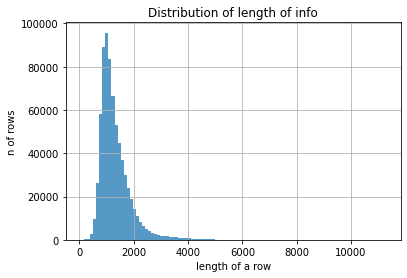

In [1075]:
from matplotlib import pyplot as plt
plt.hist(train_df.day_info.str.len(), bins=100, alpha=0.75)
plt.xlabel('length of a row')
plt.ylabel('n of rows')
plt.title('Distribution of length of info')
plt.grid(True)
plt.show()

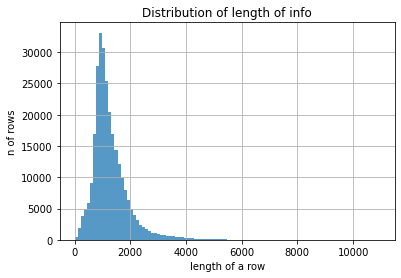

In [528]:
from matplotlib import pyplot as plt
plt.hist(train_df_finetuning.day_info.str.len(), bins=100, alpha=0.75)
plt.xlabel('length of a row')
plt.ylabel('n of rows')
plt.title('Distribution of length of info')
plt.grid(True)
plt.show()

In [1070]:
length_of_stay = train_df.sort_values(by=['hadm_id', 'day_id'], ascending=False).drop_duplicates(['hadm_id'])

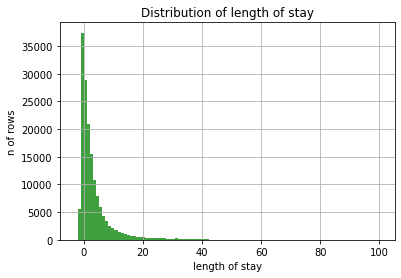

In [1076]:
from matplotlib import pyplot as plt
plt.hist(length_of_stay.day_id, bins=100, alpha=0.75, facecolor='g', range=(np.min(length_of_stay.day_id), 100))
plt.xlabel('length of stay')
plt.ylabel('n of rows')
plt.title('Distribution of length of stay')
plt.grid(True)
plt.show()

In [1081]:
print('n of admissions with length of stay up to 25 days', length_of_stay[length_of_stay.day_id <= 25].shape[0])
print('n of admissions with length of more than 25 days', length_of_stay[length_of_stay.day_id > 25].shape[0])


n of admissions with length of stay up to 25 days 155960
n of admissions with length of more than 25 days 2922


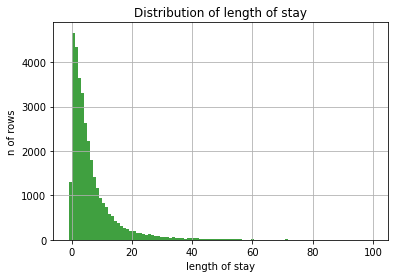

In [530]:
length_of_stay = train_df_finetuning.sort_values(by=['hadm_id', 'day_id'], ascending=False).drop_duplicates(['hadm_id'])

from matplotlib import pyplot as plt
plt.hist(length_of_stay.day_id, bins=100, alpha=0.75, facecolor='g', range=(np.min(length_of_stay.day_id), 100))
plt.xlabel('length of stay')
plt.ylabel('n of rows')
plt.title('Distribution of length of stay')
plt.grid(True)
plt.show()

## Make pid_df

In [457]:
# make pid_df 
def make_pid_df(SAVE_TO_PATH, df=train_df_pre, WITH_AKI_STATUS=True):
    pid_df = df.copy()
    adms = pid_df.hadm_id.unique().tolist()
    pid_list_of_dicts = []
    i = 0
    days = []

    for pid_adm in adms:
        toy = pid_df[pid_df.hadm_id == pid_adm].copy()
        pid_subject_id = toy.subject_id.values[0]

        days_in_visit = []
        demographics_in_visit = []
        previous_diagnoses = []
        lab_tests_in_visit = []
        medications_in_visit = []
        vitals_in_visit = []
        aki_status_in_visit = []
        days = []

        for _, row in toy.iterrows():
            days_in_visit.append(row['day_info'])
            demographics_in_visit.append(row['demographics'])
            lab_tests_in_visit.append(row['lab_tests'])
            medications_in_visit.append(row['medications'])
            vitals_in_visit.append(row['vitals'])
            previous_diagnoses.append(row['previous_diags'])
            
            if WITH_AKI_STATUS:            
                if np.isnan(row['aki_status']):
                    aki_status_in_visit.append(row['aki_status'])
                else:
                    aki_status_in_visit.append(int(row['aki_status']))
                    
                days.append(row['day_id'])

                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':pid_adm, \
                            'demographics_in_visit':demographics_in_visit,\
                            'lab_tests_in_visit':lab_tests_in_visit,\
                            'medications_in_visit':medications_in_visit,
                            'vitals_in_visit':vitals_in_visit,\
                            'days_in_visit':days_in_visit, \
                            'aki_status_in_visit':aki_status_in_visit, \
                            'previous_diagnoses':previous_diagnoses, \
                                'days':days})

            else:
                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':pid_adm, \
                        'demographics_in_visit':demographics_in_visit,\
                        'lab_tests_in_visit':lab_tests_in_visit,\
                        'medications_in_visit':medications_in_visit,
                        'vitals_in_visit':vitals_in_visit,\
                        'days_in_visit':days_in_visit, \
                        'previous_diagnoses':previous_diagnoses, \
                        'days':days})
                    
        i += 1
        # if i >5: break

        if i  % 1000 == 0:
            # with open(DF_PATH + 'pid_list_of_dicts.pkl', 'wb') as f:
            #     pickle.dump(pid_list_of_dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(f'{i} admissions finished')

    pid_test_df = pd.DataFrame(pid_list_of_dicts)

    with open(SAVE_TO_PATH, 'wb') as f:
        pickle.dump(pid_test_df, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    print(f'{i} admissions saved into a dataframe to ----> {SAVE_TO_PATH}')


### Make pid_train_df_finetuning

In [461]:
print('train_df_finetuning ', train_df_finetuning.shape[0], len(train_df_finetuning.hadm_id.unique()))
print('val_df_finetuning ', val_df_finetuning.shape[0], len(val_df_finetuning.hadm_id.unique()))
print('test_df_finetuning ', test_df_finetuning.shape[0], len(test_df_finetuning.hadm_id.unique()))
train_df_finetuning.head(3)

train_df_finetuning  210535 31693
val_df_finetuning  18455 2797
test_df_finetuning  18680 2797


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,previous_diags,aki_status
32,11082580,20000769,0,asian f 43,hematology blood hematocrit 34.1 %; hematolo...,NaN,NaN,asian f 43$nan$hematology blood hematocrit 34...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,0.0
33,11082580,20000769,1,asian f 43,hematology blood hematocrit 30.7 %; hematolo...,NaN,NaN,asian f 43$nan$hematology blood hematocrit 30...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,1.0
34,11082580,20000769,2,asian f 43,hematology blood hematocrit 25.0 %; hematolo...,sterile water 500 ml ; magnesium sulfate (ob...,NaN,asian f 43$nan$hematology blood hematocrit 25...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,1.0


In [464]:
SAVE_TO_PATH = DF_PATH + 'pid_train_df_finetuning.pkl'
make_pid_df(SAVE_TO_PATH, train_df_finetuning)

1000 admissions finished
2000 admissions finished
3000 admissions finished
4000 admissions finished
5000 admissions finished
6000 admissions finished
7000 admissions finished
8000 admissions finished
9000 admissions finished
10000 admissions finished
11000 admissions finished
12000 admissions finished
13000 admissions finished
14000 admissions finished
15000 admissions finished
16000 admissions finished
17000 admissions finished
18000 admissions finished
19000 admissions finished
20000 admissions finished
21000 admissions finished
22000 admissions finished
23000 admissions finished
24000 admissions finished
25000 admissions finished
26000 admissions finished
27000 admissions finished
28000 admissions finished
29000 admissions finished
30000 admissions finished
31000 admissions finished
31693 admissions saved into a dataframe to ----> /home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_train_df_finetuning.pkl


In [465]:
with open(DF_PATH + 'pid_train_df_finetuning.pkl', 'rb') as f:
   pid_train_df_finetuning = pickle.load(f)

with open(DF_PATH + 'pid_test_df_finetuning.pkl', 'rb') as f:
   pid_test_df_finetuning = pickle.load(f)

with open(DF_PATH + 'pid_val_df_finetuning.pkl', 'rb') as f:
   pid_val_df_finetuning = pickle.load(f)

In [474]:
pid_test_df_finetuning = pid_test_df_finetuning.drop_duplicates('hadm_id')
pid_train_df_finetuning = pid_train_df_finetuning.drop_duplicates('hadm_id')
pid_val_df_finetuning = pid_val_df_finetuning.drop_duplicates('hadm_id')

In [475]:
print(pid_test_df_finetuning.shape[0])
pid_test_df_finetuning.head(2)

1755


,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,aki_status_in_visit,previous_diagnoses,days
5,19297413,20010282,"[white m 69, white m 69, white m 69, white m 6...",[hematology blood hematocrit 42.5 %; hematol...,[sodium chloride 0.9% flush 3-10 ml ; aceta...,[temp 98.9 heartrate 72.0 resprate 17.0 ...,[white m 69$temp 98.9 heartrate 72.0 respr...,"[0, 0, 0, 0, 0]",[PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD P...,"[0, 1, 2, 3, 4]"
10,15457916,20012254,"[asian m 82, asian m 82, asian m 82, asian m 8...",[hematology blood hematocrit 31.5 %; hematol...,[morphine sulfate 2-4 mg ; omeprazole 20 m...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[asian m 82$nan$hematology blood hematocrit 3...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]",[PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD P...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [438]:
np.isnan(pid_train_df_finetuning.iloc[135].aki_status_in_visit).all()

False

In [476]:
# clean from admissions with a lot of nan in aki status

cleaned_adms = []
for _, row in pid_train_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_train_df_finetuning = pid_train_df_finetuning[pid_train_df_finetuning.hadm_id.isin(cleaned_adms)]

cleaned_adms = []
for _, row in pid_test_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_test_df_finetuning = pid_test_df_finetuning[pid_test_df_finetuning.hadm_id.isin(cleaned_adms)]

cleaned_adms = []
for _, row in pid_val_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_val_df_finetuning = pid_val_df_finetuning[pid_val_df_finetuning.hadm_id.isin(cleaned_adms)]

In [477]:
print(pid_train_df_finetuning.shape[0])
print(pid_test_df_finetuning.shape[0])
print(pid_val_df_finetuning.shape[0])

20062
1755
1747


In [478]:
ft_admissions = pid_train_df_finetuning.hadm_id.tolist() \
                    + pid_test_df_finetuning.hadm_id.tolist() \
                    + pid_val_df_finetuning.hadm_id.tolist()

len(ft_admissions)

23564

In [479]:
pid_train_df_finetuning.head()

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,aki_status_in_visit,previous_diagnoses,days
9,16679562,20001395,"[hispanic latino m 73, hispanic latino m 73, h...",[hematology blood hematocrit 51.2 %; hematol...,[influenza vaccine quadrivalent 0.5 ml ; bis...,[temp heartrate 80.0 resprate 16.0 o2sa...,[hispanic latino m 73$temp heartrate 80.0 ...,"[0, 0, 0, 1, 1, 0, 0, 1, 0]",[PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD P...,"[0, 1, 2, 3, 4, 5, 6, 7, 8]"
18,14377190,20001561,"[white f 61, white f 61, white f 61, white f 61]",[hematology blood hematocrit 29.4 %; hematol...,[enoxaparin sodium 40 mg ; sodium chloride 0...,"[nan, nan, nan, nan]",[white f 61$nan$hematology blood hematocrit 2...,"[0, 0, 0, nan]",[D1830 D1976 DV6441 PAD PAD PAD PAD PAD PAD PA...,"[0, 1, 2, 4]"
28,10995547,20003740,"[white m 69, white m 69, white m 69, white m 6...",[hematology blood hematocrit 30.9 %; hematol...,[lansoprazole oral disintegrating tab 30 mg ...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[white m 69$nan$hematology blood hematocrit 3...,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]",[D51919 D2639 D30000 DV4986 DE915 DV1582 D9351...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
43,19657904,20004357,"[black african american f 77, black african am...",[hematology blood hematocrit 28.7 %; hematol...,[senna 1 tab ; aspirin 325 mg ; amlodipine...,"[nan, nan, nan, nan, nan, nan]",[black african american f 77$nan$hematology bl...,"[0, 0, 1, 1, 0, 0]",[D78659 D311 D4019 D41401 D78720 D42822 D4280 ...,"[0, 1, 2, 3, 4, 6]"
52,14583219,20004577,"[white f 34, white f 34, white f 34, white f 34]",[hematology blood hematocrit 32.3 %; hematol...,[soln 100 ml ; acetaminophen iv 1000 mg ; ...,[temp 98.1 heartrate 87.0 resprate 16.0 ...,[white f 34$temp 98.1 heartrate 87.0 respr...,"[0, 0, 0, 0]",[PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD P...,"[0, 1, 2, 3]"


In [480]:
with open(DF_PATH+'pid_train_df_finetuning_6days_aki.pkl', 'wb') as f:
    pickle.dump(pid_train_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'pid_test_df_finetuning_6days_aki.pkl', 'wb') as f:
    pickle.dump(pid_test_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH+'pid_val_df_finetuning_6days_aki', 'wb') as f:
    pickle.dump(pid_val_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)   

### Make pid_train_df_pretraining

In [530]:
print(train_df_pre.shape[0])
print(val_df_pre.shape[0])

SAVE_TO_PATH = DF_PATH + 'pid_val_df_pretraining.pkl'
pid_df = train_df_pre
# pid_df = val_df_pre

2048946
16412


In [523]:
val_df_pre.head(2)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags,day_info
2091,17417213,20010951,-1,white f 56,NaN,lamotrigine 200 mg ; lamotrigine 50 mg ; z...,NaN,DE8781 D53081 D9962 D34590 PAD PAD PAD PAD PAD...,white f 56 $nan$nan$lamotrigine 200 mg ; la...
2092,17417213,20010951,0,white f 56,hematology blood hematocrit 41.7 %; hematolo...,lamotrigine 200 mg ; lamotrigine 50 mg ; z...,NaN,DE8781 D53081 D9962 D34590 PAD PAD PAD PAD PAD...,white f 56 $nan$hematology blood hematocrit ...


In [534]:
# make pid_df 
def make_pid_df(admission, pid_df=pid_df, SAVE_TO_PATH=SAVE_TO_PATH, WITH_AKI_STATUS=False):
    try:
        pid_list_of_dicts = []
        i = 0
        days = []
        toy = pid_df[pid_df.hadm_id == admission].copy()
        pid_subject_id = toy.subject_id.values[0]

        days_in_visit = []
        demographics_in_visit = []
        previous_diagnoses = []
        lab_tests_in_visit = []
        medications_in_visit = []
        vitals_in_visit = []
        aki_status_in_visit = []
        days = []
        
        

        for _, row in toy.iterrows():
            days_in_visit.append(row['day_info'])
            demographics_in_visit.append(row['demographics'])
            previous_diagnoses.append(row['previous_diags'])
            lab_tests_in_visit.append(row['lab_tests'])
            medications_in_visit.append(row['medications'])
            vitals_in_visit.append(row['vitals'])
            days.append(row['day_id'])
            
            if WITH_AKI_STATUS:            
                if np.isnan(row['aki_status']):
                    aki_status_in_visit.append(row['aki_status'])
                else:
                    aki_status_in_visit.append(int(row['aki_status']))
                

                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':admission, \
                            'demographics_in_visit':demographics_in_visit,\
                            'lab_tests_in_visit':lab_tests_in_visit,\
                            'medications_in_visit':medications_in_visit,
                            'vitals_in_visit':vitals_in_visit,\
                            'days_in_visit':days_in_visit, \
                            'aki_status_in_visit':aki_status_in_visit, \
                            'previous_diagnoses':previous_diagnoses, \
                            'days':days})

            else:
                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':admission, \
                        'demographics_in_visit':demographics_in_visit,\
                        'lab_tests_in_visit':lab_tests_in_visit,\
                        'medications_in_visit':medications_in_visit,
                        'vitals_in_visit':vitals_in_visit,\
                        'days_in_visit':days_in_visit, \
                        'previous_diagnoses':previous_diagnoses, \
                        'days':days})
                        
            # i += 1
            # if i >5: break

            # if i  % 1000 == 0:
            #     # with open(DF_PATH + 'pid_list_of_dicts.pkl', 'wb') as f:
            #     #     pickle.dump(pid_list_of_dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
            #     print(f'{i} admissions finished')

        # pid_test_df = pd.DataFrame(pid_list_of_dicts)

        # with open(SAVE_TO_PATH, 'wb') as f:
        #     pickle.dump(pid_test_df, f, protocol=pickle.HIGHEST_PROTOCOL)
            
        # print(f'{i} admissions saved into a dataframe to ----> {SAVE_TO_PATH}')
        return pid_list_of_dicts

In [ ]:
make_pid_df(20010951, val_df_pre)

In [ ]:
# with open(DF_PATH + 'pid_train_df_pretraining.pkl', 'rb') as f:
#     pid_train_df_pretraining = pickle.load(f)
# pid_train_df_pretraining.head()

In [890]:
# pid_train_df_pretraining.shape

(2156218, 8)

In [533]:
train_df_pre

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags,day_info
0,10467237,20000019,0,hispanic latino f 76,hematology blood hematocrit 26.5 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,temp 98.0 heartrate 65.0 resprate 16.0 o...,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $temp 98.0 heartrate ...
1,10467237,20000019,1,hispanic latino f 76,hematology blood hematocrit 28.1 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $nan$hematology blood he...
2,10467237,20000019,2,hispanic latino f 76,hematology blood hematocrit 23.9 %; hematolo...,pneumococcal 23-valent polysaccharide vaccine ...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,hispanic latino f 76 $nan$hematology blood he...
3,16925328,20000024,0,white f 92,hematology blood hematocrit 32.1 %; hematolo...,oxycodone (immediate release) 2.5 mg ; gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,white f 92 $temp 98.2 heartrate 53.0 resp...
4,16925328,20000024,1,white f 92,NaN,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,white f 92 $nan$nan$sodium chloride 0.9% flu...
...,...,...,...,...,...,...,...,...,...
2065353,16572164,29999828,2,white m 47,NaN,influenza virus vaccine 0.5 ml ; lactated ri...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,white m 47 $nan$nan$influenza virus vaccine ...
2065354,16572164,29999828,3,white m 47,NaN,influenza virus vaccine 0.5 ml ; lactated ri...,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,white m 47 $nan$nan$influenza virus vaccine ...
2065355,16549335,29999928,0,white m 38,hematology blood hematocrit 38.6 %; hematolo...,oxycodone (immediate release) 5 mg ; atorvas...,NaN,DI472 DE785 DZ8249 DZ8241 DE7800 DI2510 PAD PA...,white m 38 $nan$hematology blood hematocrit ...
2065356,16549335,29999928,1,white m 38,hematology blood hematocrit 32.0 %; hematolo...,oxycodone (immediate release) 5 mg ; atorvas...,NaN,DI472 DE785 DZ8249 DZ8241 DE7800 DI2510 PAD PA...,white m 38 $nan$hematology blood hematocrit ...


In [535]:
%%time
import traceback
import multiprocessing

SAVE_TO_PATH = DF_PATH + 'pid_train_df_pretraining.pkl'
pid_hamds = train_df_pre.hadm_id.unique().tolist()

print(f'Total {len(pid_hamds)} admissions')

final_df = pd.DataFrame()
chunk_size = 50000
n_chunks = len(pid_hamds)//chunk_size


for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=86) as pool_obj:
        df = pool_obj.map(make_pid_df, pid_hamds[i*chunk_size:(i+1)*chunk_size])
        
    for e in df[:]:
        temp = pd.DataFrame(e)
        final_df = pd.concat([final_df, temp], ignore_index=True)

    print("Finished {} admissions. Saving..".format((i+1)*chunk_size))

    with open(SAVE_TO_PATH, 'wb') as f:
        pickle.dump(final_df, f, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved!')

Total 359502 admissions
Finished 50000 admissions. Saving..
Saved!
Finished 100000 admissions. Saving..
Saved!
Finished 150000 admissions. Saving..
Saved!
Finished 200000 admissions. Saving..
Saved!
Finished 250000 admissions. Saving..
Saved!
Finished 300000 admissions. Saving..
Saved!
Finished 350000 admissions. Saving..
Saved!
Finished 400000 admissions. Saving..
Saved!
CPU times: user 12h 25min 17s, sys: 12min, total: 12h 37min 18s
Wall time: 12h 42min 47s


In [550]:
final_df = final_df.drop_duplicates(subset=['hadm_id', 'subject_id'])

In [551]:
final_df.shape

(359502, 9)

In [ ]:
with open(SAVE_TO_PATH, 'wb') as f:
    pickle.dump(final_df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [855]:
print(val_df_pre.hadm_id.unique().shape[0])
print(train_df_pre.hadm_id.unique().shape[0])

3035
376242


In [878]:
train_df_pre.hadm_id.unique()

array([20000019, 20000024, 20000034, ..., 29999745, 29999828, 29999928])

In [879]:
train_df_pre[train_df_pre.hadm_id==20000019]

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals
0,10467237,20000019,0,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {26.5} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,temp {98.0} heartrate {65.0} resprate {16.0} o...
1,10467237,20000019,1,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {28.1} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN
2,10467237,20000019,2,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {23.9} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN


In [ ]:
make_pid_df(20000019)

In [872]:
val_df_pre.hadm_id.unique()

array([20013743, 20014934, 20016550, ..., 29991391, 29994893, 29996682])

In [871]:
final_df.shape

(0, 0)

## Other

In [ ]:
# with open(DF_PATH + 'train_df.pkl', 'rb') as f:
#     train_df = pickle.load(f)

# with open(DF_PATH + 'pid_list_of_dicts.pkl', 'rb') as f:
#     pid_df = pickle.load(f)

# pid_df = pd.DataFrame(pid_df)

# days = []
# i = 0
# for adm in pid_df.hadm_id.unique():
#     days.append(train_df[train_df.hadm_id==adm].day_id.values)
#     #i += 1
#     #if i >5:break

# pid_df['days'] = days

In [23]:
with open(DF_PATH + 'train_df.pkl', 'rb') as f:
   train_df = pickle.load(f)

In [32]:
# check how many patients had aki < 10 days

S = train_df[train_df.aki_status==1.0].sort_values('day_id').drop_duplicates(subset='hadm_id')
S[S.day_id < 10]

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status
458008,17443681,24690642,-2,WHITE F 78.0,Hematology Blood hematocrit {27.3} %; Hematolo...,NaN,temp {97.2} heartrate {106.0} resprate {18.0} ...,WHITE F 78.0 temp {97.2} heartrate {106.0} res...,1.0
768433,15177955,27882895,-2,WHITE F 89.0,Hematology Blood hematocrit {42.3} %; Hematolo...,NaN,temp {98.4} heartrate {76.0} resprate {14.0} o...,WHITE F 89.0 temp {98.4} heartrate {76.0} resp...,1.0
189104,11605177,26431375,-2,WHITE F 84.0,Hematology Blood hematocrit {16.0} %; Hematolo...,NaN,temp {97.3} heartrate {81.0} resprate {20.0} o...,WHITE F 84.0 temp {97.3} heartrate {81.0} resp...,1.0
868152,16386312,28904280,-2,WHITE M 80.0,Hematology Blood hematocrit {31.9} %; Hematolo...,NaN,temp {97.6} heartrate {58.0} resprate {17.0} o...,WHITE M 80.0 temp {97.6} heartrate {58.0} resp...,1.0
161942,17894333,22030479,-2,WHITE M 60.0,Hematology Blood hematocrit {39.3} %; Hematolo...,NaN,NaN,WHITE M 60.0 nan Hematology Blood hematocrit {...,1.0
...,...,...,...,...,...,...,...,...,...
195255,15709543,26509318,9,WHITE M 31.0,Hematology Blood hematocrit {25.3} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Gabapenti...,NaN,WHITE M 31.0 nan Hematology Blood hematocrit {...,1.0
868001,14623995,28902597,9,OTHER M 63.0,Hematology Blood hematocrit {32.5} %; Hematolo...,Nicotine Patch {14} mg ; Sodium Chloride 0.9% ...,NaN,OTHER M 63.0 nan Hematology Blood hematocrit {...,1.0
320615,10174787,23289988,9,WHITE M 77.0,Hematology Blood hematocrit {32.0} %; Hematolo...,Heparin {5000} UNIT ; Bisacodyl {10} mg ; Insu...,NaN,WHITE M 77.0 nan Hematology Blood hematocrit {...,1.0
838306,19447329,28593598,9,WHITE F 92.0,Hematology Blood hematocrit {26.8} %; Hematolo...,OxyCODONE (Immediate Release) {2.5-5} mg ; Ace...,NaN,WHITE F 92.0 nan Hematology Blood hematocrit {...,1.0


In [5]:
with open(PKL_PATH + 'labevents_creatinine.pkl', 'rb') as f:
    labevents_creatinine = pickle.load(f)

In [14]:
labevents_creatinine[labevents_creatinine.hadm_id==28577344].sort_values('charttime')

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
414102,16785578,28577344,2186-07-14 21:10:00,1.2,mg/dL,2186-07-14 16:39:00,0.0
414103,16785578,28577344,2186-07-15 04:08:00,1.2,mg/dL,2186-07-14 16:39:00,0.0
414104,16785578,28577344,2186-07-15 16:00:00,0.9,mg/dL,2186-07-14 16:39:00,0.0
414105,16785578,28577344,2186-07-15 21:00:00,1.2,mg/dL,2186-07-14 16:39:00,1.0
414106,16785578,28577344,2186-07-16 03:46:00,1.5,mg/dL,2186-07-14 16:39:00,1.0
414107,16785578,28577344,2186-07-16 12:05:00,1.2,mg/dL,2186-07-14 16:39:00,1.0
414108,16785578,28577344,2186-07-17 04:10:00,1.1,mg/dL,2186-07-14 16:39:00,2.0
414109,16785578,28577344,2186-07-18 04:00:00,0.9,mg/dL,2186-07-14 16:39:00,3.0
414110,16785578,28577344,2186-07-19 07:15:00,0.9,mg/dL,2186-07-14 16:39:00,4.0
414111,16785578,28577344,2186-07-20 06:25:00,0.8,mg/dL,2186-07-14 16:39:00,5.0


In [5]:
#paths
print('Filtering admissions...')
CURR_PATH = os.getcwd()
print(CURR_PATH)
PKL_PATH = CURR_PATH+'/pickles/'
DF_PATH = '/home/svetlana.maslenkova/LSTM/dataframes/'

# loading the data
with open(DF_PATH + 'pid_train_df_finetuning_6days_aki.pkl', 'rb') as f:
    pid_train_df = pickle.load(f)

with open(DF_PATH + 'pid_val_df_finetuning_6days_aki.pkl', 'rb') as f:
    pid_val_df = pickle.load(f)

with open(DF_PATH + 'pid_test_df_finetuning_6days_aki.pkl', 'rb') as f:
    pid_test_df = pickle.load(f)

observing_window = 3 

train_admissions = []
for adm in pid_train_df.hadm_id.unique():   
    if ({1,2,3,4}.issubset(set(pid_train_df[pid_train_df.hadm_id==adm].days.values[0])) or \
        {-1,0,1,2}.issubset(set(pid_train_df[pid_train_df.hadm_id==adm].days.values[0]))or \
            {0,1,2,3}.issubset(set(pid_train_df[pid_train_df.hadm_id==adm].days.values[0]))) and \
        (len(pid_train_df[pid_train_df.hadm_id==adm].days.values[0])>3) and\
            sum(pid_train_df[pid_train_df.hadm_id==adm].aki_status_in_visit.values[0][:observing_window])==0:
        train_admissions.append(adm)

val_admissions = []
for adm in pid_val_df.hadm_id.unique():   
    if ({1,2,3,4}.issubset(set(pid_val_df[pid_val_df.hadm_id==adm].days.values[0])) or \
        {-1,0,1,2}.issubset(set(pid_val_df[pid_val_df.hadm_id==adm].days.values[0]))or \
            {0,1,2,3}.issubset(set(pid_val_df[pid_val_df.hadm_id==adm].days.values[0]))) and \
        (len(pid_val_df[pid_val_df.hadm_id==adm].days.values[0])>3) and\
            sum(pid_val_df[pid_val_df.hadm_id==adm].aki_status_in_visit.values[0][:observing_window])==0:
        val_admissions.append(adm)

test_admissions = []
for adm in pid_test_df.hadm_id.unique():   
    if ({1,2,3,4}.issubset(set(pid_test_df[pid_test_df.hadm_id==adm].days.values[0])) or \
        {-1,0,1,2}.issubset(set(pid_test_df[pid_test_df.hadm_id==adm].days.values[0]))or \
            {0,1,2,3}.issubset(set(pid_test_df[pid_test_df.hadm_id==adm].days.values[0]))) and \
        (len(pid_test_df[pid_test_df.hadm_id==adm].days.values[0])>3) and\
            sum(pid_test_df[pid_test_df.hadm_id==adm].aki_status_in_visit.values[0][:observing_window])==0:
        test_admissions.append(adm)

print('train_admissions', len(train_admissions))
print('val_admissions', len(val_admissions))
print('test_admissions', len(test_admissions))

Filtering admissions...
/home/svetlana.maslenkova/LSTM/aki_prediction/other
train_admissions 10624
val_admissions 939
test_admissions 938


In [33]:
pos_48 = []
for arr in pid_test_df[pid_test_df.hadm_id.isin(test_admissions)].aki_status_in_visit.values:
    if np.sum(arr[:4])>0:
        pos_48.append(1)
    else:
        pos_48.append(0)

In [34]:
sum(pos_48)

146

In [35]:
len(pos_48)

938